<font size="5"> <div class="alert alert-block alert-info"> Machine Learning Project - Group 27 </div> </font> 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0dFut9RjhIwwK1LBIlU3h045PTD_tdwc6SA&s" style="float: right;" width="200">

  <font size="5"> Master in Data Science and Advanced Analytics </font>
 
  
  <font size="4"> **Gonçalo Rilhas, 20250490**</font><br>
  <font size="4"> **Guilherme Santos, 20250510**</font><br>
  <font size="4"> **Luana Pinto, 20250481**</font><br>
  <font size="4"> **Marta Pedro, 20250500**</font>

    
  <font size="3"> Instructors: Roberto Henriques, Leon Debatin, Ricardo Santos </font> 
  
  
  
 
  
  <font size="5"> <div class="alert alert-success" role="alert"> Cars 4 You: Expediting Car Evaluations with ML </div></font> 

### Business Understanding & Data Context

**Cars 4 You** is an online platform specializing in the resale of used vehicles, purchasing cars directly from private owners.
At present, every car listed on the platform must undergo a physical inspection by a mechanic before a price offer can be generated. However, as the company has expanded, this manual step has become a major operational bottleneck, increasing customer waiting times and leading many potential sellers to abandon the process in favor of competitors.

To address this issue, Cars 4 You has shared a dataset containing historical records of car inspections and purchases. The objective of this project is to **develop a machine learning model** that can accurately **estimate a vehicle’s price based solely on the seller’s input data**, eliminating the need for an initial mechanical evaluation.

**Dataset Metadata:**

| **Attribute**       | **Description** |
|----------------------|-----------------|
| **carID**            | Unique identifier assigned to each car in the dataset. |
| **Brand**            | Manufacturer or brand of the vehicle (e.g., Ford, Toyota). |
| **model**            | Specific model name of the car. |
| **year**             | Year of vehicle registration. |
| **mileage**          | Total distance travelled by the car (in miles). |
| **tax**              | Annual road tax applicable to the car in 2020 (in £). |
| **fuelType**         | Type of fuel used by the vehicle (e.g., Diesel, Petrol, Hybrid, Electric). |
| **mpg**              | Average fuel efficiency in miles per gallon. |
| **engineSize**       | Engine size in liters (cubic decimeters). |
| **paintQuality%**    | Mechanic’s assessment of the car’s paint quality and hull integrity (percentage). |
| **previousOwners**   | Number of previous registered owners. |
| **hasDamage**        | Boolean flag indicating whether the car has any reported damage (0 = No, 1 = Yes). |
| **price**            | (*Target feature*) Purchase price of the vehicle by *Cars 4 You* (in £). |

**Note**: We will not remove any observations in the *test* data set since we have to submit the predictions of all inputs in Kaggle.

---

### Import the needed libraries 

First, the necessary libraries were imported for the execution of the project, which include predefined functions for test automation, models, or formatting.

In [233]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

#filter methods
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV
sns.set()

# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Modeling and Modeling Metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 27
np.random.seed(RSEED)

In [234]:
# Importing the datasets 
train = pd.read_csv('project_data/train.csv', index_col = 'carID')
test = pd.read_csv('project_data/test.csv', index_col = 'carID')

In [235]:
train.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [236]:
train.shape

(75973, 13)

In [237]:
train.loc[12786]

Brand                   NaN
model                    i3
year                 2015.0
price                 17400
transmission      Automatic
mileage             29465.0
fuelType           Electric
tax                     0.0
mpg                   470.8
engineSize         3.822758
paintQuality%          67.0
previousOwners          2.0
hasDamage               0.0
Name: 12786, dtype: object

In [238]:
train.columns

Index(['Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [239]:
test.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


In [240]:
test.shape

(32567, 12)

In [241]:
test.columns

Index(['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage'],
      dtype='object')

**Categorical Variables:**

- `'Brand'`

- `'model'` 

- `'transmission'`

- `'fuelType'`

- `'hasDamage'` (binary categorical variable)

**Quantitative Variables:**

- `'year'` 

- `'price'` (target variable)

- `'mileage'` 

- `'tax'`  

- `'mpg'`   

- `'engineSize'`  

- `'paintQuality%'`

- `'previousOwners'` 

## Exploratory data analysis

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 10.1+ MB


In [243]:
# Checking unique values in every variable
for col in train.columns:
    print(f"{col}: {train[col].unique()}")

Brand: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris' 

In [244]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


The `train dataset` comprises 75,973 vehicle listings with several notable characteristics in its **numerical features**:
- The vehicles span manufacturing **years** from 1970 to 2024, with a median year of 2017, indicating a relatively modern inventory where three-quarters of the vehicles were manufactured in 2019 or later.
- **Pricing** shows considerable variation, ranging from £450 to £159,999, with a median price of £14,699 and the middle 50% of vehicles priced between £10,200 and £20,950. The *right-skewed price distribution*, where the mean price of £16,882 exceeds the median, suggests the presence of higher-value premium vehicles within the dataset.
- Vehicle condition and usage metrics reveal a wide **mileage** spectrum from problematic negative values to 323,000 miles, while fuel efficiency averages 55.15 **MPG** with some extreme readings reaching 470.8 MPG.
- **Paint quality** assessments generally indicate good condition with a median of 65%, though some values illogically exceed 100%.
- Technical specifications show a predominance of small to medium **engines** with a median **size** of 1.6L, typical ownership history of 1-2 previous owners, and **road tax** amounts that cluster around £125-£145 for most vehicles.

The analysis also reveals several data quality considerations, including invalid negative values in multiple features, missing data across variables, and a completely non-varying 'hasDamage' flag that may limit its predictive utility.

In [245]:
train.describe(include = ["O"]).T

,count,unique,top,freq
Brand,74452,72,Ford,14808
model,74456,735,Focus,6353
transmission,74451,40,Manual,38050
fuelType,74462,34,Petrol,37995


The `train dataset`'s **categorical variables** reveal a diverse vehicle inventory with distinct concentration patterns:
- The **Brand** feature displays significant fragmentation, containing 72 unique manufacturers, yet demonstrates a strong market dominance by Ford, which accounts for 14,808 listings - nearly 20% of all vehicles.
- The **model** distribution shows even greater variety with 735 unique models, though the model Focus emerges as the most prevalent individual model.
- **Transmission** types are predominantly manual, representing over half of all vehicles (38,050 listings), while petrol engines constitute the majority **fuel type** with 37,995 vehicles.

In [246]:
train.groupby(['Brand'])['price'].median().sort_values(ascending=False)

Brand
ud         35995.0
ERCEDES    27526.0
MERCEDE    26789.5
Mercede    22990.0
MW         22898.0
            ...   
OPEL        9898.0
FOR         9795.0
opel        9500.0
yunda       8995.0
TOYOT       6690.0
Name: price, Length: 72, dtype: float64

It is observed that the variable `Brand` contains noise and orthographic inconsistencies (e.g., “ud”, “ERCEDES”, “MW”), which artificially fragment the distribution of car prices. It is essential to:
- Perform a correction process for brand names to ensure that all variations are consolidated under a unified label.

After this cleaning step, one would expect to observe the anticipated market pattern: premium brands (such as Mercedes, BMW, Audi) exhibit higher median prices, whereas mass-market brands (such as Ford, Toyota, Hyundai) tend to have lower median price levels.

In [247]:
train.groupby(['model'])['price'].median().sort_values(ascending=False)

model
 r8         135000.0
R8          109990.0
 G Class     99850.0
 R8          95950.0
S Class      74874.5
              ...   
 VECTRA       1795.0
 Fox          1590.0
Vectra        1495.0
 Vectra       1450.0
 Accent       1295.0
Name: price, Length: 735, dtype: float64

The `model` variable exhibits a wide range of median prices, reflecting substantial variation across vehicle types and segments. However, it also presents significant inconsistencies in formatting and spelling (e.g., “r8”, “ R8”, “ R8 ”, “Vectra”, “ Vectra”), indicating that the data contain spaces and capitalization inconsistencies.

Such discrepancies artificially increase the number of unique categories, reducing the interpretability and reliability of model-level analyses. After cleaning the model names, clearer price patterns are expected to emerge - with high-performance models (e.g., Audi R8, Mercedes G-Class, S-Class) showing markedly higher median prices, and entry-level models (e.g., Vectra, Accent, Fox) occupying the lower end of the price spectrum.

In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 89856 to 99627
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           31918 non-null  object 
 1   model           31917 non-null  object 
 2   year            31914 non-null  float64
 3   transmission    31944 non-null  object 
 4   mileage         31878 non-null  float64
 5   fuelType        31911 non-null  object 
 6   tax             29259 non-null  float64
 7   mpg             29279 non-null  float64
 8   engineSize      31939 non-null  float64
 9   paintQuality%   31942 non-null  float64
 10  previousOwners  31970 non-null  float64
 11  hasDamage       31970 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


In [249]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,31914.0,2017.102299,2.207969,1991.000000,2016.00,2017.0,2019.0,2024.121759
mileage,31878.0,22952.658921,22132.758713,-58540.574478,7298.25,17225.5,32500.0,279000.000000
tax,29259.0,120.569239,65.560570,-91.121630,125.00,145.0,145.0,580.000000
mpg,29279.0,55.210728,17.644635,-43.421768,46.30,54.3,62.8,470.800000
engineSize,31939.0,1.665377,0.574467,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,31942.0,64.446667,21.142188,1.638913,47.00,65.0,82.0,125.594308
previousOwners,31970.0,2.006118,1.472310,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,31970.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


In [250]:
test.describe(include = ["O"]).T

,count,unique,top,freq
Brand,31918,64,Ford,6360
model,31917,593,Focus,2721
transmission,31944,38,Manual,16312
fuelType,31911,29,Petrol,16113


The `test dataset` contains 31,970 vehicle listings and demonstrates strong consistency with the training set across all metric and categprical features:
- The temporal distribution mirrors the training data with vehicles spanning 1991-2024 and a median manufacturing **year** of 2017.
- Technical specifications show identical patterns, including **engine sizes** clustered around 1.6L and road **tax** concentrations between £125-£145.
- Ford remains the dominant **brand** with 6,360 vehicles, followed by Focus as the most common **model**.
- Manual **transmissions** and petrol engines continue to be the prevailing choices, maintaining the same preference patterns observed in the training data.

The dataset replicates the same data quality considerations observed in training, particularly negative values in **mileage**, **tax**, and **MPG** features, along with **paint quality** readings exceeding 100%.

</p>

Quick exploratory analysis of the dataset to understand the distribution of variables, detect inconsistencies, and observe general trends *before* moving on to data cleaning and preprocessing:

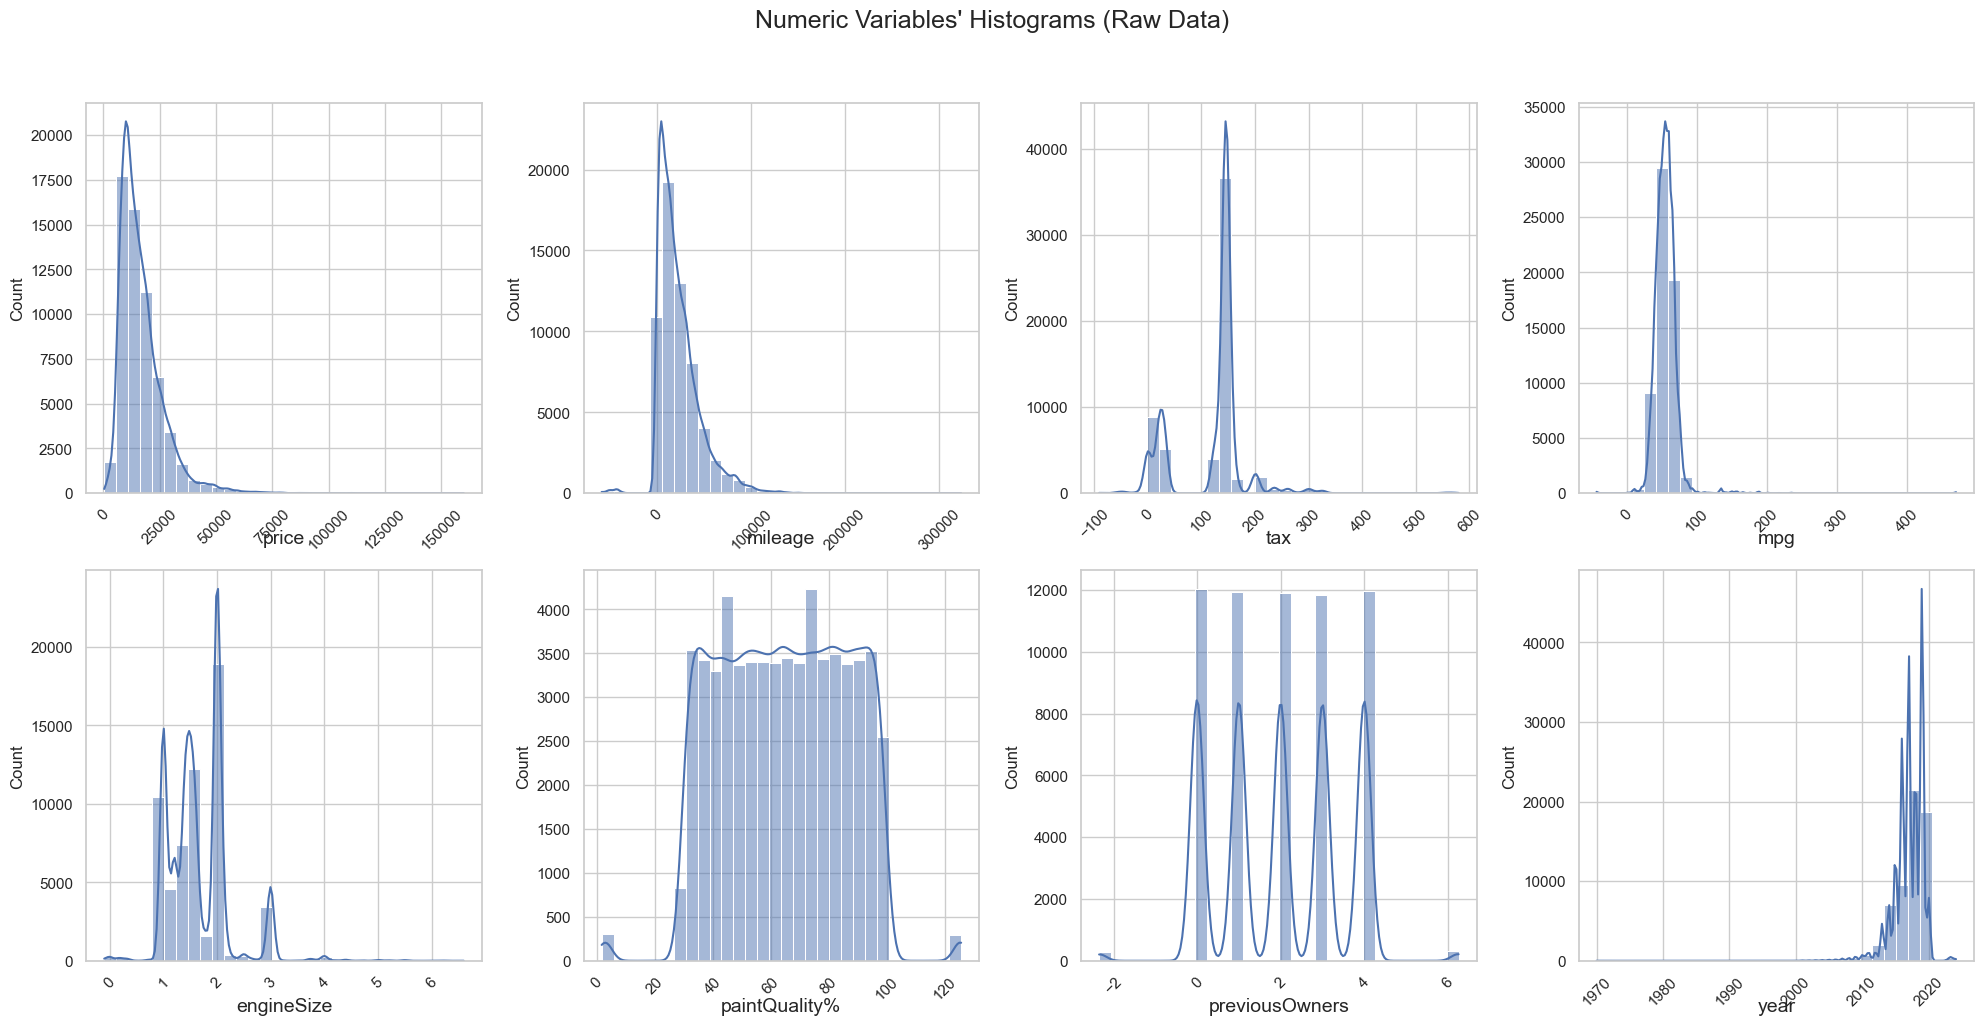

In [251]:
sns.set(style="whitegrid")
raw_numeric_features = [
    'price', 'mileage', 'tax', 'mpg', 
    'engineSize', 'paintQuality%', 'previousOwners', 'year'
]

sp_rows = 2
sp_cols = 4 # Adjusted to 4 columns to match the 8 features

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))
axes = axes.flatten() 

# Plot data
# We use train.dropna() to ensure no NaNs prevent plotting
df_plot = train.dropna(subset=raw_numeric_features)

for ax, feat in zip(axes, raw_numeric_features):
    sns.histplot(df_plot[feat], kde=True, ax=ax, bins=30) 
    ax.set_title(feat, y=-0.15, fontsize=14)
    ax.set_xlabel('') 
    ax.tick_params(axis='x', rotation=45)

# Layout
title = "Numeric Variables' Histograms (Raw Data)" 
plt.suptitle(title, fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
# plt.savefig('numeric_variables_histograms_raw.png', dpi=200)
plt.show()

- `price`, `mileage`, `tax`, `mpg`, `engineSize`: All these continuous variables exhibit extreme right-skewness, where the median is significantly closer to the minimum quartile. This skewness is compounded by the presence of numerous statistical outliers extending towards the upper limits. This structural issue strongly supports the need for logarithmic or inverse transformations to normalize distributions and stabilize variance.

- `tax`: The extreme skewness is visible, confirming the concentration of data points in the standard tax rate bands (£125 to £145) and the need to mitigate the influence of outliers such the high-end £580 values.

- `previousOwners`: While this is a discrete variable, the boxplot is heavily clustered around low counts (0 to 4 previous owners), confirming the variable is not normally distributed.

- `year`: This feature is primarily concentrated at the high-end (there are more cars fabricated in recent years), displaying an expected left-skew, with some cars being fabricated since the 70's.

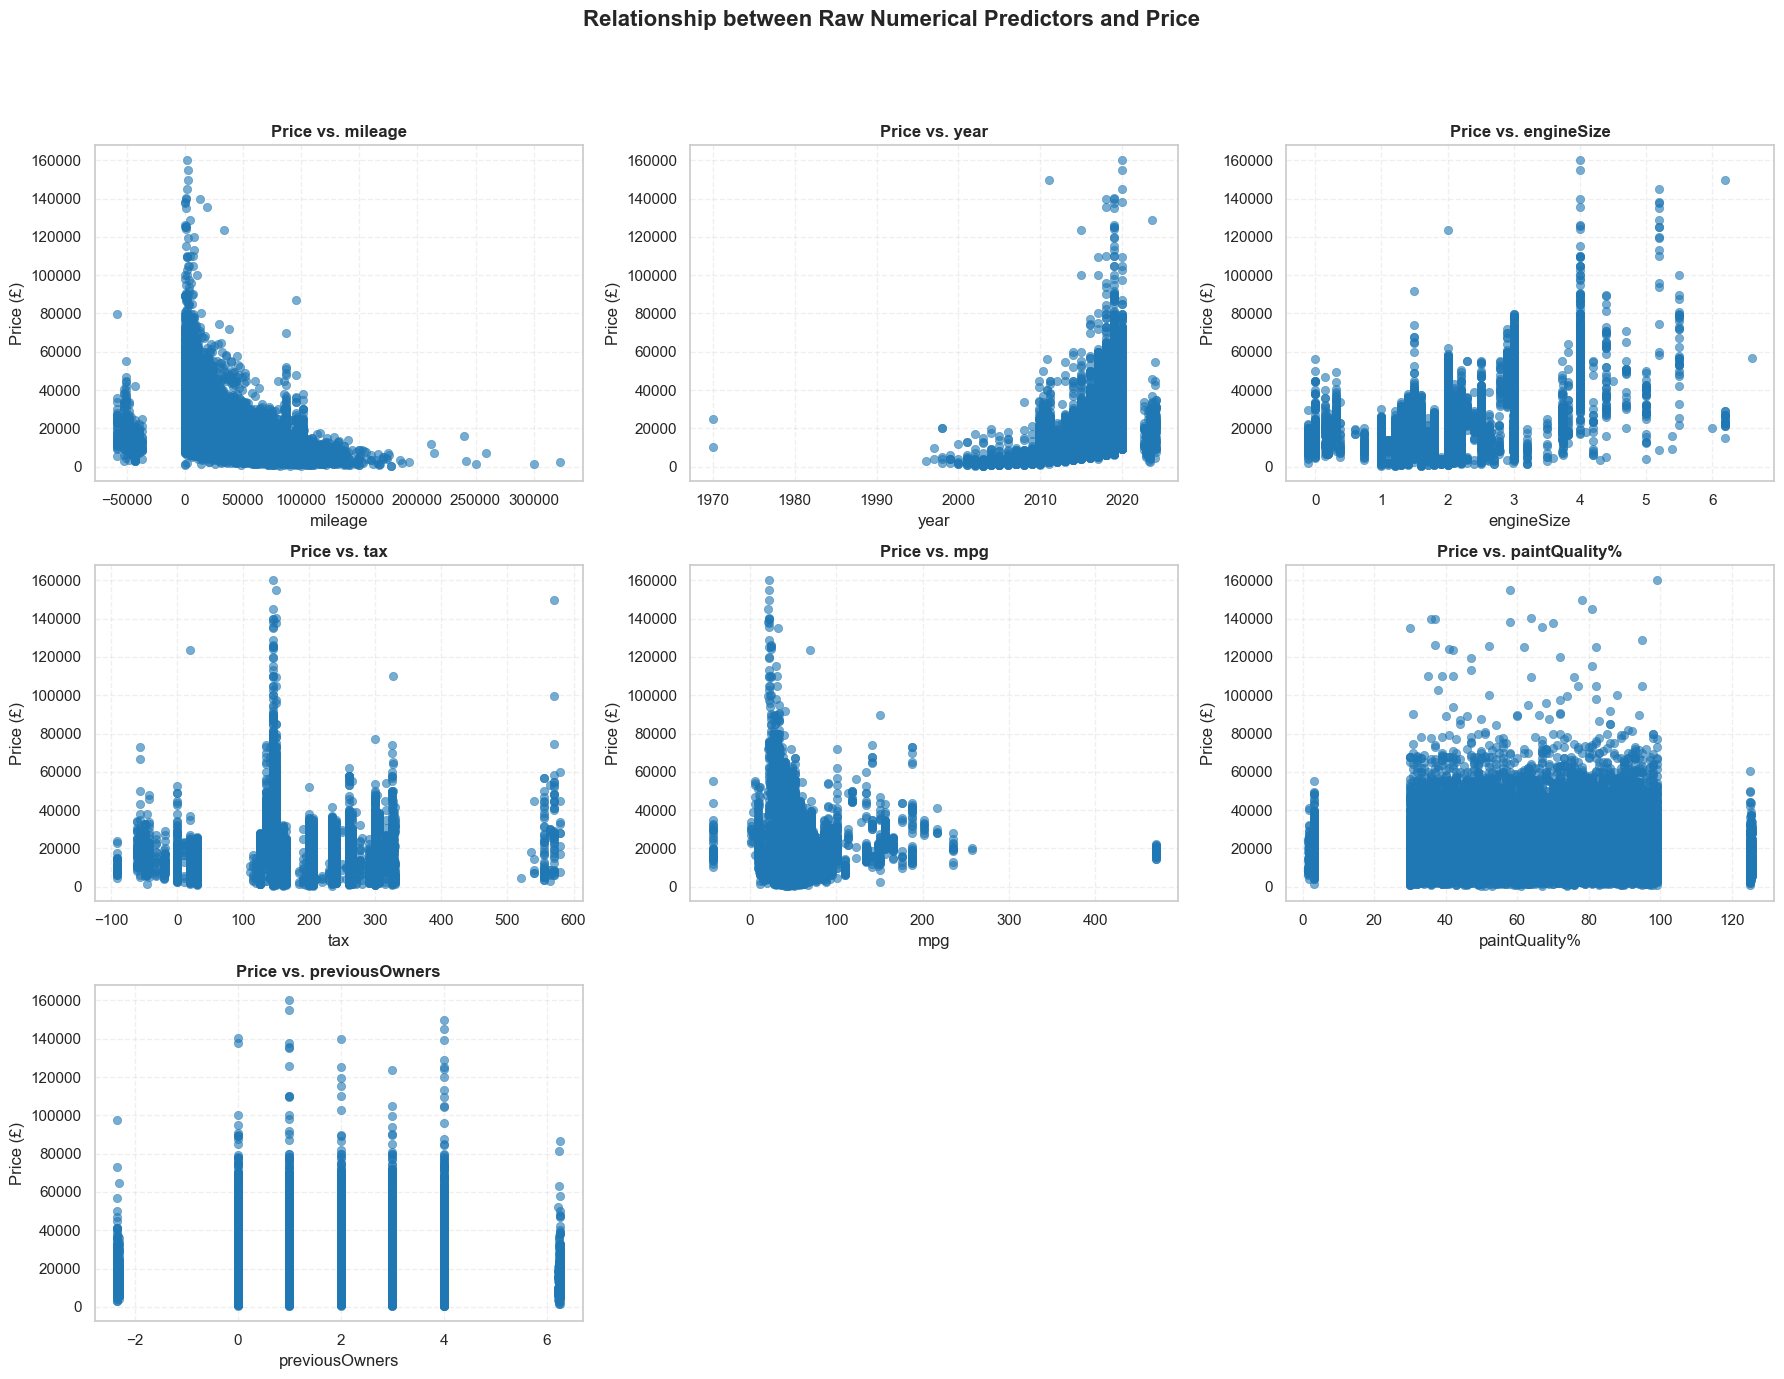

In [252]:
# Scatter Plots
# Copy dataset for visualization
train_viz_raw = train.copy()

# Define numeric features for visualization
features_for_raw_plot = ['mileage', 'year', 'engineSize', 'tax', 'mpg', 'paintQuality%', 'previousOwners']

# Set up grid layout
n_cols = 3
n_rows = int(np.ceil(len(features_for_raw_plot) / n_cols))

plt.figure(figsize=(6 * n_cols, 4.5 * n_rows))
plt.suptitle(
    'Relationship between Raw Numerical Predictors and Price',
    fontsize=16,
    fontweight='bold',
    y=1.02
)

# Generate scatterplots 
for i, feature in enumerate(features_for_raw_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(
        data=train_viz_raw,
        x=feature,
        y='price',
        alpha=0.6,
        color='#1f77b4',
        edgecolor=None
    )
    plt.title(f'Price vs. {feature}', fontsize=12, fontweight='semibold')
    plt.xlabel(feature)
    plt.ylabel('Price (£)')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
# plt.savefig('relatioship_ntarget_raw.png', dpi=200)
plt.show()

The *bivariate analysis* of the raw numerical predictors against the target variable, `price`, confirms the expected non-linear relationships and severe data skewness that necessitate data preparation and feature engineering.

- `mileage vs. price`: A clear strong negative relationship is visible: price drops rapidly as mileage increases. However, this relationship is fundamentally non-linear and heavily clustered near zero-mileage.

- `year vs. price`: This plot shows a strong positive relationship where newer cars (higher year values) command higher prices. The scatter plot indicates that price is highly and consistently dependent on the year of registration, confirming that age is the primary determinant of the vehicle's current value.

- `tax vs. price`: The raw distribution of tax is visibly concentrated around the common VED rate, with scattered high-end points. The true relationship with price is obscured by this clustering.

- `engineSize vs price`: Shows a general upward trend, but with high variance at every engine size.

- `mpg vs price`: The relationship between mpg and price also appears non-linear and widely dispersed, obscuring the true inverse relationship between fuel consumption rate and price.

-  The `paintQuality%` values are clustered centrally, showing high price variance across the entire quality range, while `previousOwners` shows tight clustering at low counts (0-4 owners) with no clear trend, indicating that these features may be less significant in the final multivariate model. 

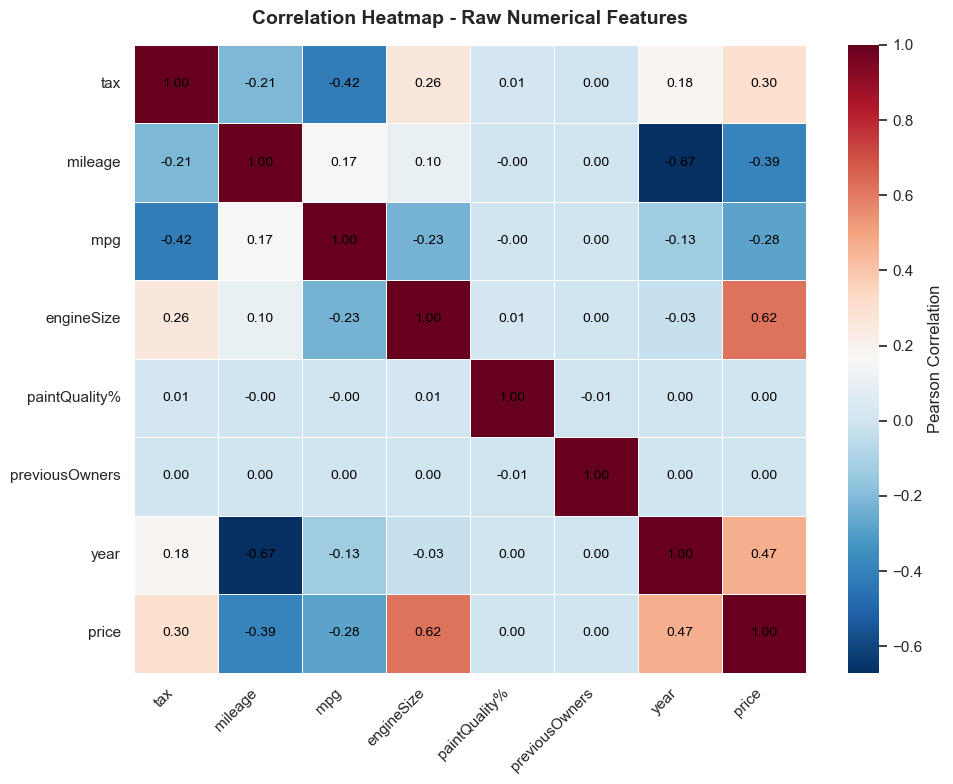


Top correlations with PRICE (raw data):
price             1.00
engineSize        0.62
year              0.47
tax               0.30
previousOwners    0.00
paintQuality%     0.00
mpg              -0.28
mileage          -0.39
Name: price, dtype: float64


In [253]:
# We used target transformation for visualization only
# Created log-transformed target variable (log_price) for visualization
train_viz_raw = train.copy()
train_viz_raw['log_price'] = np.log1p(train_viz_raw['price'])

# MULTIVARIATE ANALYSIS: CORRELATION HEATMAP (raw data)
# Define relevant numeric features (raw)
raw_numeric_features = [
    'tax', 
    'mileage', 
    'mpg', 
    'engineSize', 
    'paintQuality%', 
    'previousOwners', 
    'year', 
    'price'
]

# Compute correlation matrix (dropping NA for consistency)
corr_matrix_raw = (
    train_viz_raw[raw_numeric_features]
    .dropna()
    .corr(method='pearson')
    .round(2)
)

# Visualization: Enhanced Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix_raw,
    annot=True,
    cmap='RdBu_r',
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={'label': 'Pearson Correlation'},
    annot_kws={"size": 10, "color": "black"}
)

plt.title('Correlation Heatmap - Raw Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# plt.savefig('correlation_heatmap_raw.png', dpi=200)
plt.show()

print("\nTop correlations with PRICE (raw data):")
corr_with_price = corr_matrix_raw['price'].sort_values(ascending=False)
print(corr_with_price)

The **correlation heatmap** provides critical multivariate insights to inform the feature engineering strategy. The analysis highlights two crucial findings.
- Firstly, in terms of primary price drivers, `year` and `mileage` exhibit the strongest correlation with `price`, confirming their fundamental role in vehicle valuation.
- Conversely, features like `tax` and `mpg` display weak raw correlation coefficients with price. This weakness is not indicative of low predictive power but rather confirms the non-linear, highly skewed nature of their raw distributions, reinforcing the need for subsequent transformations to establish a clear linear relationship with the target.
- Secondly, and most critically for model stability, a significant negative correlation is clearly visible between the predictors `mileage` and `year`. This high degree of multicollinearity is logical, as a car's usage is inversely related to its age. 

---
**NOTE:**

A preliminary review of the *categorical attributes* (`Brand`, `model`, `transmission`, and `fuelType`) revealed a significant number of inconsistent and redundant entries. This is due to variations in spelling, capitalization, and the inclusion of numerous low-frequency or misspelled categories (e.g., "ord", "anual ", "emi-Auto").

To draw meaningful and reliable conclusions from a visual exploration, such as analyzing median price distributions via boxplots, these categorical features require extensive text normalization and cleaning to consolidate all variants into standardized categories. Since the comprehensive analysis of categorical variables will only be insightful after these cleaning steps are performed in the subsequent preprocessing phase, the group limit the inicial exploratory data analysis and graphical representation to the *quantitative variables*. 

## Data partition

Before moving on with preprocessing steps, ee decided to use the **holdout method** for data partition - in this approach we randomly split the complete data into training and test sets. Then perform the model training on the training set and use the test set for validation purposes. We splited the data into **70:30**.

In [254]:
X = train.drop('price', axis = 1) # Remove our target ('price') for predicting purposes
y = train['price'] # Defining y as our target 

In [255]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, 
                                                  random_state = 15, 
                                                  # stratify = y, 
                                                  shuffle = True)

In [256]:
type(y_train)

pandas.core.series.Series

In [257]:
# Checking to see if our data is well divided
X_train

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
42904,Mercedes,CLS Class,2017.0,Semi-Aut,30000.0,Diesel,165.0,51.400000,3.0,86.0,4.0,0.0
65965,VW,Tiguan,2019.0,NaN,12101.0,Diesel,150.0,11.417268,NaN,49.0,0.0,0.0
69226,VW,Passat,2018.0,Automatic,4429.0,Petrol,145.0,48.700000,1.8,92.0,1.0,0.0
36037,Mercedes,GLC Class,2019.0,Semi-Auto,NaN,Diesel,145.0,44.800000,2.0,31.0,4.0,0.0
1129,Audi,A5,2019.0,Semi-Auto,1475.0,Petrol,145.0,39.800000,2.0,93.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46253,Mercedes,GLA Class,2016.0,Automatic,16908.0,Diesel,20.0,64.200000,2.1,68.0,4.0,0.0
32161,Hyundai,IX20,2016.0,Automatic,13302.0,Petrol,160.0,43.500000,1.6,81.0,2.0,0.0
46794,Skoda,Fabia,2019.0,Manual,2508.0,Petrol,145.0,52.300000,1.0,49.0,2.0,0.0


In [258]:
X_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
14278,BMW,5 Series,2019.0,Semi-Auto,4043.0,Diesel,145.0,60.1,2.0,86.0,1.0,0.0
56641,Opel,Corsa,2019.0,Manual,9118.0,Petrol,150.0,44.8,1.4,31.0,1.0,0.0
2172,Audi,Q3,2016.0,Semi-Auto,38035.0,Petrol,145.0,47.9,1.4,70.0,3.0,0.0
59953,Opel,Mokka X,2017.0,Manual,36951.0,Diesel,145.0,68.9,1.6,51.0,0.0,0.0
38177,Mercedes,GLC Class,2019.0,automatic,3000.0,Diesel,145.0,40.9,2.0,57.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75427,VW,Scirocco,2016.0,Manual,10173.0,Petrol,125.0,52.3,1.4,82.0,1.0,0.0
41842,Mercedes,M Class,2010.0,Automatic,92000.0,Diesel,555.0,32.5,3.0,45.0,2.0,0.0
2104,AUDI,A4,2013.0,Manual,47805.0,Petrol,200.0,43.5,1.8,73.0,2.0,0.0


### Data pre-processing

The Data Pre-processing is fundamental to our project. In this stage we ensure that the dataset is clean and smooth for our models to make predictions. We will start by handling the duplicates and missing values and then we will clean each feature separately. 


In [259]:
# Check for duplicate rows in X_train
X_train.duplicated().sum()

np.int64(9)

In [260]:
X_train[X_train.duplicated(keep=False)]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
34301,Hyundai,Ioniq,2019.0,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0
66842,VW,Golf,2019.0,Semi-Auto,100.0,Petrol,150.0,32.8,2.0,73.0,4.0,0.0
58117,Opel,Astra,2020.0,Manual,10.0,Petrol,145.0,54.3,1.2,37.0,3.0,0.0
60327,Opel,Astra,2017.0,Manual,24160.0,Petrol,125.0,51.4,1.4,75.0,4.0,0.0
33774,Hyundai,I10,2017.0,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
71941,VW,Golf,2019.0,Semi-Auto,100.0,Petrol,150.0,32.8,2.0,73.0,4.0,0.0
55913,Opel,Corsa,2019.0,Manual,100.0,Petrol,145.0,43.5,1.4,44.0,0.0,0.0
58441,Opel,Astra,2017.0,Manual,24160.0,Petrol,125.0,51.4,1.4,75.0,4.0,0.0
61662,Opel,Corsa,2019.0,Manual,100.0,Petrol,145.0,43.5,1.4,44.0,0.0,0.0


After inspecting the `train dataset`, we found some rows that are exact duplicates across all features except for `'carID'`.
Given the project’s context, where each row represents a unique car submitted by a customer for evaluation, such duplicates are unlikely to correspond to distinct vehicles and are more likely due to data entry errors or repeated submissions.
Therefore, the group decided to **remove** these duplicates, keeping only the first occurrence of each unique combination of car attributes.

In [261]:
# Remove duplicate car listings, keeping only the first occurrence of each unique vehicle
X_train = (X_train.reset_index().drop_duplicates(subset=X_train.columns.difference(['carID'])).set_index('carID'))
X_train.duplicated().sum()

np.int64(0)

In [262]:
# Check for duplicates in X_val
# No existing duplicated values
X_val.duplicated().sum()

np.int64(0)

In [263]:
# Check for duplicates in Test
# No existing duplicated values
test.duplicated().sum()

np.int64(0)

In [264]:
# To check to see our missing values, the group decided to check the percentage of Nan 
(X_train.isna().sum() / len(X_train)*100).sort_values(ascending=False) 

mpg               10.358835
tax               10.308057
previousOwners     2.121417
paintQuality%      2.048070
engineSize         2.019860
transmission       2.019860
model              2.002934
fuelType           1.995411
hasDamage          1.984127
mileage            1.965320
year               1.937110
Brand              1.912661
dtype: float64

In [265]:
(X_val.isna().sum() / len(X_val)*100).sort_values(ascending=False) 

tax               10.622148
mpg               10.600211
Brand              2.211302
hasDamage          2.163040
year               2.022640
model              1.983152
fuelType           1.974377
transmission       1.965602
engineSize         1.939277
paintQuality%      1.908564
previousOwners     1.851527
mileage            1.829589
dtype: float64

In [266]:
(test.isna().sum() / len(test)*100).sort_values(ascending=False) 

tax               10.157521
mpg               10.096110
mileage            2.115639
fuelType           2.014309
year               2.005097
model              1.995885
Brand              1.992815
engineSize         1.928332
paintQuality%      1.919121
transmission       1.912979
previousOwners     1.833144
hasDamage          1.833144
dtype: float64

In [267]:
# Exploring the unique values of our categorical variables 
object_columns = X_train.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = X_train[column].value_counts(dropna=False).index
    print(f"Unique values for {column}:\n{unique_values}\n")
    
del object_columns

Unique values for Brand:
Index([    'Ford', 'Mercedes',       'VW',     'Opel',      'BMW',     'Audi',
         'Toyota',    'Skoda',  'Hyundai',        nan,      'ord',     'FORD',
           'ford',      'For',  'ercedes', 'mercedes', 'MERCEDES',        'W',
              'V',  'Mercede',       'vw',      'pel',      'Ope',     'OPEL',
           'opel',      'Aud',     'audi',       'BM',       'MW',     'AUDI',
            'bmw',      'udi',    'skoda',    'oyota',   'toyota',   'TOYOTA',
           'Skod',     'koda',    'Toyot',    'SKODA',  'HYUNDAI',   'yundai',
         'Hyunda',  'hyundai',       'or',   'ercede',      'ope',       'pe',
            'OPE',      'for',  'mercede',   'hyunda',       'mw',       'ud',
        'MERCEDE',      'FOR',    'OYOTA',      'ORD',  'ERCEDES',      'AUD',
           'KODA',      'PEL',    'yunda',        'v',      'aud',      'kod',
           'SKOD',      'UDI',        'w',   'HYUNDA'],
      dtype='object', name='Brand')

Unique values

__`'Brand' variable`__

In [268]:
# The percentage of NaN in X_train is approximately 1.91%
X_train['Brand'].isna().sum()

np.int64(1017)

In [269]:
# The percentage of NaN in X_val is approximately 2.21%

X_val['Brand'].isna().sum()

np.int64(504)

In [270]:
# The percentage of NaN in test is approximately 1.99%

test['Brand'].isna().sum()

np.int64(649)

The `'Brand'` attribute, as we saw before, contains multiple inconsistent spellings and capitalization issues (e.g., "ford", "For", "FORD", "ord"). To ensure consistency and prevent the model from interpreting these variations, we **mappped** common misspellings and abbreviations to a standardized brand name using a manually defined dictionary (e.g., all variants of “skoda” turn to “Skoda”). This **normalization** ensures that all equivalent brands are treated as a single category during model training.

In [271]:
# Create copies of DataFrames to prevent unintended modifications to the original DataFrame
X_train = X_train.copy()
X_val = X_val.copy()
test = test.copy()

In [272]:
# Remove any whitespace and convert to lowercase 
X_train['Brand'] = X_train['Brand'].astype(str).str.strip().str.lower()
X_val['Brand'] = X_val['Brand'].astype(str).str.strip().str.lower()
test['Brand'] = test['Brand'].astype(str).str.strip().str.lower()

In [273]:
# Replace empty strings or 'nan' with np.nan to ensure consistent handling of missing data
X_train['Brand'] = X_train['Brand'].replace(['', 'nan', 'none', 'null'], np.nan)
X_val['Brand'] = X_val['Brand'].replace(['', 'nan', 'none', 'null'], np.nan)
test['Brand'] = test['Brand'].replace(['', 'nan', 'none', 'null' ], np.nan)

In [274]:
# Defining a normalized mapping based on the attribute's unique values
# Each dictionary key is the clean model name, and the list contains possible variations found in the data
brand_normalization = {
    'mercedes': ['mercedes', 'ercedes', 'mercede', 'merce', 'ercede', 'ercedes', 'merced', 'erce'],
    'volkswagen': ['vw', 'v', 'w', 'volkswagen'],
    'audi': ['audi', 'aud', 'udi', 'au', 'audii', 'audd', 'auddi', 'ud'],
    'ford': ['ford', 'for', 'ord', 'forr', 'fordd', 'or', 'fo'],
    'toyota': ['toyota', 'toyot', 'oyota', 'oyot', 'toyotaa'],
    'bmw': ['bmw', 'bm', 'mw', 'bw', 'bmmw', 'bwm','m'],
    'skoda': ['skoda', 'skod', 'koda', 'kod', 'skodaa'],
    'opel': ['opel', 'pel', 'ope', 'o', 'opeel', 'opell', 'pe'],
    'hyundai': ['hyundai', 'hyunda', 'yundai', 'hundai', 'yunda', 'hyund', 'hyundd']
}

# Build lookup dictionary: map all brand variants to their standardized names
reverse_map = {}
for clean_name, variants in brand_normalization.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply mapping to all DataFrames - any unmapped values will keep their original value
X_train['Brand'] = X_train['Brand'].map(reverse_map).fillna(X_train['Brand'])
X_val['Brand'] = X_val['Brand'].map(reverse_map).fillna(X_val['Brand'])
test['Brand'] = test['Brand'].map(reverse_map).fillna(test['Brand'])

# Capitalize first letter and handle missing values
X_train['Brand'] = X_train['Brand'].fillna('Missing').str.capitalize()
X_val['Brand'] = X_val['Brand'].fillna('Missing').str.capitalize()
test['Brand'] = test['Brand'].fillna('Missing').str.capitalize()

In [275]:
print(f"Total records: {len(X_train)}")
print(f"Sum of value counts: {X_train['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{X_train['Brand'].unique()}")
print(f"\nUnique value counts:{X_train['Brand'].value_counts()}")

Total records: 53172
Sum of value counts: 53172
Unique values:['Mercedes' 'Volkswagen' 'Audi' 'Ford' 'Toyota' 'Bmw' 'Skoda' 'Opel'
 'Hyundai' 'Missing']

Unique value counts:Brand
Ford          11209
Mercedes       8137
Volkswagen     7306
Opel           6524
Bmw            5160
Audi           5140
Toyota         3263
Skoda          3071
Hyundai        2345
Missing        1017
Name: count, dtype: int64


In [276]:
for df in [X_train, X_val, test]:
    if 'Brand' in df.columns:
        df['Brand'] = df['Brand'].fillna('Missing')

In [277]:
print(f"Total records: {len(X_val)}")
print(f"Sum of value counts: {X_val['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{X_val['Brand'].unique()}")
print(f"\nUnique value counts:{X_val['Brand'].value_counts()}")

Total records: 22792
Sum of value counts: 22792
Unique values:['Bmw' 'Opel' 'Audi' 'Mercedes' 'Ford' 'Toyota' 'Volkswagen' 'Hyundai'
 'Skoda' 'Missing']

Unique value counts:Brand
Ford          4852
Mercedes      3537
Volkswagen    3078
Opel          2824
Bmw           2232
Audi          2185
Toyota        1359
Skoda         1232
Hyundai        989
Missing        504
Name: count, dtype: int64


In [278]:
print(f"Total records: {len(test)}")
print(f"Sum of value counts: {test['Brand'].value_counts().sum()}") # check if there are any missing values
print(f"Unique values:{test['Brand'].unique()}")
print(f"\nUnique value counts:{test['Brand'].value_counts()}")

Total records: 32567
Sum of value counts: 32567
Unique values:['Hyundai' 'Volkswagen' 'Bmw' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyota'
 'Audi' 'Missing']

Unique value counts:Brand
Ford          6888
Mercedes      5004
Volkswagen    4466
Opel          4008
Bmw           3174
Audi          3130
Toyota        1982
Skoda         1839
Hyundai       1427
Missing        649
Name: count, dtype: int64


In [279]:
test[test['Brand']=='M']

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,


The data cleaning process has been completed successfully without any loss of records. The total number of records matches exactly with the sum of all value counts in the `'Brand'` column. All original data has been preserved while successfully categorizing the 72 brand variations into **10**, standardized categories (9 major brands + 'Missing' category). The transformation maintains complete data integrity while significantly improving data quality for machine learning.

__`'model' variable`__

The `'model'` attribute also contains inconsistent spellings and variations. We normalized these to a standard name to ensure all equivalent models are treated as a single category. For rows where `'Brand'` is missing, we attempted to infer the brand based on the model using existing mappings in the dataset.

In [280]:
# Number of unique models per car brand 
model_per_brand = X_train.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand)

Brand
Missing       170
Volkswagen    109
Mercedes       86
Bmw            86
Ford           86
Opel           85
Toyota         63
Audi           59
Skoda          57
Hyundai        45
Name: model, dtype: int64


In [281]:
model_per_brand1 = X_val.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand1)

Brand
Missing       125
Mercedes       81
Volkswagen     73
Ford           68
Bmw            67
Opel           65
Audi           48
Toyota         48
Skoda          44
Hyundai        43
Name: model, dtype: int64


In [282]:
model_per_brand2 = test.groupby('Brand')['model'].nunique().sort_values(ascending=False)
print(model_per_brand2)

Brand
Missing       130
Volkswagen     90
Mercedes       81
Ford           76
Opel           74
Bmw            64
Toyota         57
Skoda          53
Audi           52
Hyundai        41
Name: model, dtype: int64


In [283]:
# Text cleaning
X_train['model'] = X_train['model'].astype(str).str.strip().str.lower()
X_val['model'] = X_val['model'].astype(str).str.strip().str.lower()
test['model'] = test['model'].astype(str).str.strip().str.lower()

In [284]:
# Checking to see the models per car brand 
models_for_brand = X_train[X_train['Brand'] == 'Volkswagen']['model'].unique()
print(f"\nVolkswagen unique models:{models_for_brand}")


Volkswagen unique models:['tiguan' 'passat' 'polo' 'nan' 'golf' 'passa' 't-cross' 'cc' 't-roc' 'up'
 'caddy maxi life' 'caravelle' 'touareg' 'pol' 'sharan' 'arteon'
 'scirocco' 't-ro' 'beetle' 'touran' 'golf sv' 'california' 'shuttle'
 'jetta' 'amarok' 'tiguan allspace' 'gol' 'golf s' 'toura' 't-cros'
 'caddy life' 'u' 'tigua' 'tiguan allspac' 'caddy maxi' 'amaro' 'arteo'
 'scirocc' 'eos' 'caddy' 'shara' 'beetl' 'touare' 'caravell']


In [285]:
models_for_brand = X_train[X_train['Brand'] == 'Mercedes']['model'].unique()
print(f"\nMercedes unique models:{models_for_brand}")


Mercedes unique models:['cls class' 'glc class' 'e class' 'c class' 'gla class' 'sl class'
 'cl class' 'a class' 'm class' 'gl class' 'e clas' 'gle class' 'nan'
 'glb class' 'x-class' 'b class' 'cla class' 's class' 'gls class'
 'glc clas' 'slk' 'a clas' 'v class' 'c clas' 'sl clas' 'g class' 'v clas'
 'clk' 'gle clas' 'b clas' 'gla clas' 'sl' 'x-clas' 'cls clas' '200'
 'gls clas' 'clc class' 'cl clas']


In [286]:
models_for_brand = X_train[X_train['Brand'] == 'Bmw']['model'].unique()
print(f"\nBmw unique models:{models_for_brand}")


Bmw unique models:['3 series' '2 series' '7 series' '1 series' '8 series' 'x1' '3 serie'
 '4 series' 'x5' 'x2' 'x3' 'm3' 'nan' '5 series' 'z4' 'm6' 'x4' '1 serie'
 '5 serie' '2 serie' 'i3' 'm4' 'x6' 'm2' '6 series' 'm5' 'x7' '4 serie'
 'x' 'i8' 'm' 'z3' 'i' '6 serie' '8 serie' '7 serie' 'z']


In [287]:
models_for_brand = X_train[X_train['Brand'] == 'Ford']['model'].unique()
print(f"\nFord unique models:{models_for_brand}")


Ford unique models:['nan' 'focus' 'mondeo' 'grand tourneo connect' 's-max' 'fiesta' 'ka+'
 'ecosport' 'kuga' 'puma' 'c-max' 'b-max' 'tourneo custom' 'grand c-max'
 'focu' 'fiest' 'galaxy' 'ka' 'k' 'edge' 'tourneo connect' 'kug' 'mustang'
 'grand tourneo connec' 'grand c-ma' 'monde' 'b-ma' 'ecospor' 'fusion'
 'c-ma' 'galax' 'edg' 'tourneo custo' 'escort' 's-ma']


In [288]:
models_for_brand = X_train[X_train['Brand'] == 'Opel']['model'].unique()
print(f"\nOpel unique models:{models_for_brand}")


Opel unique models:['corsa' 'crossland x' 'astra' 'mokka x' 'mokka' 'insignia' 'nan'
 'combo life' 'zafira' 'viva' 'grandland x' 'meriva' 'insigni' 'mokk'
 'gtc' 'adam' 'zafir' 'kadjar' 'crossland' 'antara' 'astr' 'cors' 'tigra'
 'zafira tourer' 'viv' 'cascada' 'vivaro' 'agila' 'zafira toure' 'vectra'
 'ampera' 'ada' 'grandland' 'meriv' 'combo lif']


In [289]:
models_for_brand = X_train[X_train['Brand'] == 'Toyota']['model'].unique()
print(f"\nToyota unique models:{models_for_brand}")


Toyota unique models:['aygo' 'yaris' 'prius' 'auris' 'corolla' 'rav4' 'c-hr' 'supra'
 'land cruise' 'verso' 'gt86' 'avensis' 'hilux' 'nan' 'urban cruiser'
 'ayg' 'land cruiser' 'c-h' 'auri' 'verso-s' 'camry' 'proace verso' 'yari'
 'rav' 'coroll' 'iq' 'urban cruise']


In [290]:
models_for_brand = X_train[X_train['Brand'] == 'Audi']['model'].unique()
print(f"\nAudi unique models:{models_for_brand}")


Audi unique models:['a5' 'a6' 'q2' 'q3' 'a4' 'nan' 'a1' 'rs6' 'rs3' 'a3' 'q5' 'tt' 'q7' 'q'
 'a' 'sq7' 'a8' 'rs4' 's4' 'a7' 's3' 'rs5' 'q8' 'a2' 's8' 'r8' 't' 'rs'
 'sq5' 's5']


In [291]:
models_for_brand = X_train[X_train['Brand'] == 'Skoda']['model'].unique()
print(f"\nSkoda unique models:{models_for_brand}")


Skoda unique models:['fabia' 'octavia' 'scala' 'karoq' 'superb' 'rapid' 'yeti outdoor' 'nan'
 'kamiq' 'citigo' 'kodia' 'yeti' 'kodiaq' 'roomster' 'fabi' 'octavi' 'yet'
 'yeti outdoo' 'citig' 'scal' 'karo' 'super' 'rapi' 'roomste']


In [292]:
models_for_brand = X_train[X_train['Brand'] == 'Hyundai']['model'].unique()
print(f"\nHyundai unique models:{models_for_brand}")


Hyundai unique models:['i30' 'i10' 'ioniq' 'i800' 'tucson' 'i40' 'ix20' 'kona' 'i20' 'ix35'
 'santa fe' 'santa f' 'i2' 'i1' 'i3' 'nan' 'tucso' 'i80' 'getz' 'ioni'
 'ix2' 'kon' 'terracan']


There are car models with models equal to the string 'nan'. So, the string 'nan' was replaced with proper missing values and fill them as 'Missing'. This ensures that all missing or invalid entries are consistently represented.

In [293]:
# Missing values at 'model' attribute
missing_models = X_train[X_train['model'].isna()]
print(len(missing_models))

0


In [294]:
# Replace string 'nan' with np.nan
X_train['model'] = X_train['model'].replace('nan', np.nan)
X_val['model'] = X_val['model'].replace('nan', np.nan)
test['model'] = test['model'].replace('nan', np.nan)

# Optionally fill missing models with 'Missing', like it was done at the 'Brand' attribute
X_train['model'] = X_train['model'].fillna('Missing')
X_val['model'] = X_val['model'].fillna('Missing')
test['model'] = test['model'].fillna('Missing')

In [295]:
# Normalize model names by car brand - same logic for 'Brand' normalization
# Only abbreviations and badly written variants were corrected
model_normalization = {
    # Volkswagen 
    'volkswagen': {
        'golf': ['golf', 'gol', 'golf s', 'golf sv'],
        'polo': ['polo', 'pol'],
        'passat': ['passat', 'passa'],
        'tiguan': ['tiguan', 'tigua', 'tiguan allspace', 'tiguan allspac'],
        't-roc': ['t-roc', 't-ro', 'troc'],
        't-cross': ['t-cross', 't-cros', 't-cro'],
        'sharan': ['sharan', 'shara'],
        'touareg': ['touareg', 'touare', 'touar'],
        'amarok': ['amarok', 'amaro'],
        'arteon': ['arteon', 'arteo'],
        'scirocco': ['scirocco', 'scirocc'],
        'up': ['up', 'u'],
        'caddy': ['caddy', 'caddy maxi', 'caddy maxi life', 'caddy life'],
        'caravelle': ['caravelle', 'caravell'],
        'touran': ['touran', 'toura'],
        'beetle': ['beetle', 'beetl'],
    },
    # Mercedes
    'mercedes': {
        'a class': ['a class', 'a clas'],
        'b class': ['b class', 'b clas'],
        'c class': ['c class', 'c clas'],
        'e class': ['e class', 'e clas'],
        's class': ['s class', 's clas'],
        'sl class': ['sl class', 'sl clas', 'sl'],
        'glc class': ['glc class', 'glc clas'],
        'gle class': ['gle class', 'gle clas'],
        'gls class': ['gls class', 'gls clas'],
        'gla class': ['gla class', 'gla clas'],
        'v class': ['v class', 'v clas'],
        'x class': ['x-class', 'x-clas'],
        'cls class': ['cls class', 'cls clas'],
        'cl class': ['cl class', 'cl clas'],
    },
    # BMW 
    'bmw': {
        '1 series': ['1 series', '1 serie'],
        '2 series': ['2 series', '2 serie'],
        '3 series': ['3 series', '3 serie'],
        '4 series': ['4 series', '4 serie'],
        '5 series': ['5 series', '5 serie'],
        '6 series': ['6 series', '6 serie'],
        '7 series': ['7 series', '7 serie'],
        '8 series': ['8 series', '8 serie'],
        'z3': ['z3', 'z'],
        'i8': ['i8', 'i'],
    },
    # Ford 
    'ford': {
        'focus': ['focus', 'focu'],
        'fiesta': ['fiesta', 'fiest'],
        'mondeo': ['mondeo', 'monde'],
        'ka': ['ka', 'k', 'ka+'],
        'ecosport': ['ecosport', 'ecospor'],
        'kuga': ['kuga', 'kug'],
        'b-max': ['b-max', 'b-ma'],
        'c-max': ['c-max', 'c-ma', 'grand c-max', 'grand c-ma'],
        's-max': ['s-max', 's-ma'],
        'tourneo connect': ['tourneo connect', 'grand tourneo connect', 'grand tourneo connec'],
        'tourneo custom': ['tourneo custom', 'tourneo custo'],
        'galaxy': ['galaxy', 'galax'],
        'edge': ['edge', 'edg'],
    },
    # Opel 
    'opel': {
        'corsa': ['corsa', 'cors'],
        'astra': ['astra', 'astr'],
        'insignia': ['insignia', 'insigni'],
        'mokka': ['mokka', 'mokk', 'mokka x'],
        'crossland': ['crossland', 'crossland x'],
        'grandland': ['grandland', 'grandland x'],
        'zafira': ['zafira', 'zafir', 'zafira tourer', 'zafira toure'],
        'meriva': ['meriva', 'meriv'],
        'combo life': ['combo life', 'combo lif'],
        'vivaro': ['vivaro', 'viv', 'viva'],
        'adam': ['adam', 'ada'],
    },
    # Toyota 
    'toyota': {
        'aygo': ['aygo', 'ayg'],
        'yaris': ['yaris', 'yari'],
        'auris': ['auris', 'auri'],
        'corolla': ['corolla', 'coroll'],
        'rav4': ['rav4', 'rav'],
        'c-hr': ['c-hr', 'c-h'],
        'land cruiser': ['land cruiser', 'land cruise', 'urban cruiser', 'urban cruise'],
        'verso': ['verso', 'verso-s'],
    },
    # Audi 
    'audi': {
        'tt': ['tt', 't'],
        'a': ['a'],  # unclear, might need cleaning manually later
    },
    # Skoda
    'skoda': {
        'fabia': ['fabia', 'fabi'],
        'octavia': ['octavia', 'octavi'],
        'scala': ['scala', 'scal'],
        'karoq': ['karoq', 'karo'],
        'superb': ['superb', 'super'],
        'rapid': ['rapid', 'rapi'],
        'yeti': ['yeti', 'yet', 'yeti outdoor', 'yeti outdoo'],
        'citigo': ['citigo', 'citig'],
        'kodiaq': ['kodiaq', 'kodia'],
        'roomster': ['roomster', 'roomste'],
    },
    # Hyundai 
    'hyundai': {
        'i10': ['i10', 'i1'],
        'i20': ['i20', 'i2'],
        'i30': ['i30', 'i3'],
        'i800': ['i800', 'i80'],
        'ix20': ['ix20', 'ix2'],
        'kona': ['kona', 'kon'],
        'ioniq': ['ioniq', 'ioni'],
        'tucson': ['tucson', 'tucso'],
        'santa fe': ['santa fe', 'santa f'],
    }
}

# Build reverse lookup dictionary for all brands
reverse_model_map = {
    variant: model
    for brand_models in model_normalization.values()
    for model, variants in brand_models.items()
    for variant in variants
}

# Apply normalization by matching each brand’s models
for brand in model_normalization.keys():
    mask = X_train['Brand'].str.lower() == brand
    X_train.loc[mask, 'model'] = X_train.loc[mask, 'model'].map(reverse_model_map).fillna(X_train.loc[mask, 'model'])

    mask_val = X_val['Brand'].str.lower() == brand
    X_val.loc[mask_val, 'model'] = X_val.loc[mask_val, 'model'].map(reverse_model_map).fillna(X_val.loc[mask_val, 'model'])

    mask_test = test['Brand'].str.lower() == brand
    test.loc[mask_test, 'model'] = test.loc[mask_test, 'model'].map(reverse_model_map).fillna(test.loc[mask_test, 'model'])

In [296]:
# Rows where 'Brand' is 'Missing' in X_train
missing_brand_rows = X_train[X_train['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

1017


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
47905,Missing,octavia,NaN,Manual,10000.0,Diesel,145.0,67.3,1.6,94.0,0.0,0.0
52793,Missing,yaris,2013.0,Automatic,33618.0,Hybrid,0.0,80.7,1.5,44.0,1.0,0.0
5854,Missing,a5,2019.0,Automatic,18.0,Petrol,145.0,39.8,2.0,72.0,3.0,0.0
60392,Missing,astra,2016.0,Manual,69960.0,Diesel,0.0,78.5,1.6,75.0,0.0,0.0
25442,Missing,focus,2019.0,Manual,14206.0,Petrol,150.0,60.1,1.0,74.0,4.0,0.0


In [297]:
# Rows where 'Brand' is 'Missing' in X_val
missing_brand_rows = X_val[X_val['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

504


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
48744,Missing,fabia,2006.0,Manual,141000.0,Diesel,125.0,60.1,1.4,43.0,0.0,0.0
23214,Missing,focus,2017.0,Manual,47311.0,iesel,NaN,NaN,1.5,72.0,0.0,0.0
35093,Missing,e class,2017.0,Semi-Auto,16534.0,Diesel,20.0,72.4,2.0,NaN,0.0,0.0
82,Missing,a3,2016.0,Manual,NaN,Petrol,30.0,58.9,1.4,80.0,3.0,0.0
36392,Missing,e class,2018.0,Semi-Auto,17993.0,Diesel,145.0,58.9,2.0,64.0,4.0,0.0


In [298]:
# Rows where 'Brand' is 'Missing' in test
missing_brand_rows = test[test['Brand'] == 'Missing']
print(missing_brand_rows.shape[0])
missing_brand_rows.head()

649


,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
101591,Missing,mokka x,2017.0,Manual,3273.000000,Petrol,200.0,42.2,1.6,71.0,0.0,0.0
91953,Missing,a class,2014.0,Manual,37642.000000,Diesel,0.0,78.5,1.5,73.0,4.0,0.0
90119,Missing,tucson,2016.0,Manual,74520.808024,Diesel,30.0,61.7,1.7,35.0,1.0,0.0
89711,Missing,i20,2017.0,Manual,23000.000000,Petrol,145.0,58.9,1.2,80.0,3.0,0.0
78656,Missing,q3,2019.0,automatic,5644.000000,Diesel,145.0,48.7,2.0,72.0,1.0,0.0


To address the issue of having entries with "Missing" values in `Brand` while having information in `model` , as shown above, we implemented a strategy that consists in using the model as reference to fill the brand values.

In [299]:
# Create a mapping from 'model' - most common 'Brand' using training data
model_to_brand_map = (
    X_train[X_train['Brand'] != 'Missing']
    .groupby('model')['Brand']
    .agg(lambda x: x.value_counts().idxmax())  # get most frequent 'Brand' for each model
    .to_dict()
)

# Fill missing Brand values in training and validation set based on model mapping
missing_mask_train = X_train['Brand'] == 'Missing'
X_train.loc[missing_mask_train, 'Brand'] = X_train.loc[missing_mask_train, 'model'].map(model_to_brand_map)

missing_mask_val = X_val['Brand'] == 'Missing'
X_val.loc[missing_mask_val, 'Brand'] = X_val.loc[missing_mask_val, 'model'].map(model_to_brand_map)

missing_mask_test = test['Brand'] == 'Missing'
test.loc[missing_mask_test, 'Brand'] = test.loc[missing_mask_test, 'model'].map(model_to_brand_map)

In [300]:
print("Number of remaining missing Brands in X_train:", (X_train['Brand'] == 'Missing').sum())
print("Number of remaining missing Brands in X_val:", (X_val['Brand'] == 'Missing').sum())
print("Number of remaining missing Brands in test:", (test['Brand'] == 'Missing').sum())

# Show sample of corrected rows
if missing_mask_train.any():
    print("\nSample of corrected training rows:")
    print(X_train.loc[missing_mask_train].head(10))

Number of remaining missing Brands in X_train: 0
Number of remaining missing Brands in X_val: 0
Number of remaining missing Brands in test: 0

Sample of corrected training rows:
          Brand    model    year transmission  mileage fuelType    tax  \
carID                                                                    
47905     Skoda  octavia     NaN       Manual  10000.0   Diesel  145.0   
52793    Toyota    yaris  2013.0    Automatic  33618.0   Hybrid    0.0   
5854       Audi       a5  2019.0    Automatic     18.0   Petrol  145.0   
60392      Opel    astra  2016.0       Manual  69960.0   Diesel    0.0   
25442      Ford    focus  2019.0       Manual  14206.0   Petrol  150.0   
52572    Toyota     aygo     NaN       Manual  24183.0   Petrol    0.0   
19600      Ford    focus  2017.0       Manual  13131.0   Petrol   20.0   
62581      Opel    astra  2017.0       Manual  18802.0   Petrol  145.0   
35512  Mercedes  c class  2019.0    Automatic  14271.0   Petrol    NaN   
31146   

Handling missing `model` values is more challenging than `Brand`. Unlike `Brand`, we cannot reliably infer the car model from other features, since multiple models may share similar characteristics. Therefore, it was chosen to be left as **Missing**.

In [301]:
# Rows where Model is 'Missing' in X_train
missing_model_rows = X_train[X_train['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

1065
            Brand    model    year transmission  mileage fuelType    tax  \
carID                                                                      
29450        Ford  Missing  2019.0       Manual   2016.0   Petrol  145.0   
74631  Volkswagen  Missing  2018.0       Manual  15701.0   Petrol  150.0   
62303        Opel  Missing  2015.0       Manual  49208.0      NaN  125.0   
30730        Ford  Missing  2019.0       Manual    238.0   Petrol  150.0   
7248         Audi  Missing  2019.0    Automatic   2250.0   Diesel  145.0   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                              
29450  48.7         1.1           62.0             0.0        0.0  
74631  55.4         1.0           83.0             1.0        0.0  
62303  51.4         1.2           33.0             4.0        0.0  
30730  53.3         1.0           76.0             0.0        0.0  
7248   50.4         2.0           70.0             4.0

In [302]:
# Rows where Model is 'Missing' in X_val
missing_model_rows = X_val[X_val['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

452
          Brand    model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                          
64053      Opel  Missing  2015.0     Automati  21459.0   Petrol  200.0  40.4   
51903    Toyota  Missing  2015.0       Manual  48002.0   Diesel   20.0  67.3   
5494       Audi  Missing  2015.0       Manual  65799.0   Diesel   20.0  67.3   
11791       Bmw  Missing  2016.0    Automatic  68000.0   Diesel  145.0  54.3   
34843  Mercedes  Missing  2019.0    Semi-Auto  13469.0   Diesel    NaN   NaN   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
64053         1.4           37.0             2.0        0.0  
51903         1.6           33.0             0.0        0.0  
5494          2.0           81.0             1.0        0.0  
11791         2.0           61.0             0.0        0.0  
34843         2.0           47.0             3.0        0.0  


In [303]:
# Rows where Model is 'Missing' in test
missing_model_rows = test[test['model'] == 'Missing']
print(missing_model_rows.shape[0])
print(missing_model_rows.head()) 

650
         Brand    model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                         
84196     Ford  Missing  2008.0       Manual  56000.0   Petrol  145.0  49.6   
89973  Hyundai  Missing  2015.0       Manual  42910.0   Petrol   20.0   NaN   
77561     Audi  Missing  2016.0    Semi-Auto  63938.0   Diesel  160.0  50.4   
97739    Skoda  Missing  2016.0       Manual  22996.0   Diesel   30.0  64.2   
77228     Audi  Missing  2015.0       Manual  39056.0   Diesel  200.0  47.9   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
84196         1.4           38.0             3.0        0.0  
89973         1.0           89.0             1.0        0.0  
77561         2.0           77.0             0.0        0.0  
97739         2.0           65.0             3.0        0.0  
77228         2.0           39.0             1.0        0.0  


#### **Ordinal Encoding**

Both `Brand` and `model` are high-cardinality categorical variables: they contain a large number of unique combinations (different car brands and individual models).

Traditional encoding methods such as One-Hot Encoding (OHE) would produce hundreds of sparse dummy variables, dramatically increasing the dataset’s dimensionality and potentially leading to overfitting due to the high number of parameters and increased computational cost.

To address this, we applied **Ordinal Encoding**, which assigns a unique integer value to each category.
Although ordinal encoding imposes an artificial order among categories, it provides a compact numeric representation suitable for regression models that can handle non-linear relationships.

In [304]:
# Before applying the encoder we checked if there were any NaNs in the dataset
print(X_train['Brand'].isna().sum())
print(X_val['Brand'].isna().sum())
print(test['Brand'].isna().sum())

# Filling the NaNs with "Missing"
X_train['Brand']= X_train['Brand'].fillna('Missing').str.capitalize()
X_val['Brand']= X_val['Brand'].fillna('Missing').str.capitalize()
test['Brand'] = test['Brand'].fillna('Missing').str.capitalize()

print(X_train['Brand'].isna().sum())
print(X_val['Brand'].isna().sum())
print(test['Brand'].isna().sum())

65
30
42
0
0
0


In [305]:
X_train['Brand'].value_counts()

Brand
Ford          11429
Mercedes       8289
Volkswagen     7449
Opel           6617
Bmw            5261
Audi           5230
Toyota         3330
Skoda          3113
Hyundai        2389
Missing          65
Name: count, dtype: int64

In [306]:
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # ensure robustness to unseen brands or 
                                                                                   # models in the validation and test datasets
ord_encoder.fit(X_train[['Brand', 'model']])

X_train[['Brand_encoded', 'model_encoded']] = ord_encoder.transform(X_train[['Brand', 'model']])
X_val[['Brand_encoded', 'model_encoded']] = ord_encoder.transform(X_val[['Brand', 'model']])
test[['Brand_encoded', 'model_encoded']] = ord_encoder.transform(test[['Brand', 'model']])

__`'transmission' variable`__

Again, normalize `'transmission'` values. Corrected inconsistent spellings and capitalization (e.g., 'manual', 'Manua', 'MANUAL'). Also, mapped unknown or missing values (nan, 'unknown', 'nknown', etc.) to 'Missing'. 

In [307]:
# Replace unknown/missing variants with np.nan
X_train['transmission'] = X_train['transmission'].replace(
    ['nan', 'unknown', 'nknown', 'UNKNOWN', 'unknow', 'nknow'], np.nan)

X_val['transmission'] = X_val['transmission'].replace(
    ['nan', 'unknown', 'nknown', 'UNKNOWN', 'unknow', 'nknow'], np.nan)

test['transmission'] = test['transmission'].replace(
    ['nan', 'unknown', 'nknown', 'UNKNOWN', 'unknow', 'nknow'], np.nan)

In [308]:
X_train['transmission'] = X_train['transmission'].astype(str).str.strip().str.lower()
X_val['transmission'] = X_val['transmission'].astype(str).str.strip().str.lower()
test['transmission'] = test['transmission'].astype(str).str.strip().str.lower()

transmission_mapping = {
    'manual': ['manual', 'manua', 'anual', 'anua', 'manua', 'manual '],
    'automatic': ['automatic', 'automati', 'automati', 'utomatic', 'utomati', 'utomatic', 'automatic'],
    'semi-auto': ['semi-auto', 'semi-aut', 'emi-auto', 'emi-aut', 'emi-auto', 'semi-aut'],
    'other': ['other']
}

reverse_map = {}
for clean_name, variants in transmission_mapping.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply mapping and fill missing
X_train['transmission'] = X_train['transmission'].map(reverse_map).fillna('Missing').str.capitalize()
X_val['transmission'] = X_val['transmission'].map(reverse_map).fillna('Missing').str.capitalize()
test['transmission'] = test['transmission'].map(reverse_map).fillna('Missing').str.capitalize()

In [309]:
transmission_mapping = {'Other': 'Missing', 'Missing': 'Missing'}

for df in [X_train, X_val, test]:
    df['transmission'] = df['transmission'].replace(transmission_mapping)

In [310]:
print("Unique values in X_train 'transmission':", X_train['transmission'].unique())
print(X_train['transmission'].value_counts())

Unique values in X_train 'transmission': ['Semi-auto' 'Missing' 'Automatic' 'Manual']
transmission
Manual       29137
Semi-auto    11814
Automatic    10640
Missing       1581
Name: count, dtype: int64


In [311]:
print("Unique values in X_val 'transmission':", X_val['transmission'].unique())
print(X_val['transmission'].value_counts())

Unique values in X_val 'transmission': ['Semi-auto' 'Manual' 'Automatic' 'Missing']
transmission
Manual       12484
Semi-auto     5057
Automatic     4569
Missing        682
Name: count, dtype: int64


In [312]:
print("Unique values in test 'transmission':", test['transmission'].unique())
print(test['transmission'].value_counts())

Unique values in test 'transmission': ['Automatic' 'Semi-auto' 'Manual' 'Missing']
transmission
Manual       17889
Semi-auto     7267
Automatic     6440
Missing        971
Name: count, dtype: int64


__`'fuelType' variable`__

Again, normalize `'fuelType'` values. Corrected inconsistent spellings and capitalization. Also, mapped unknown or missing values to 'Missing'. 

In [313]:
# Replace missing variants with np.nan
X_train['fuelType'] = X_train['fuelType'].replace(['nan'], np.nan)
X_val['fuelType'] = X_val['fuelType'].replace(['nan'], np.nan)
test['fuelType'] = test['fuelType'].replace(['nan'], np.nan)

In [314]:
# Remove whitespace and convert to lowercase
X_train['fuelType'] = X_train['fuelType'].astype(str).str.strip().str.lower()
X_val['fuelType'] = X_val['fuelType'].astype(str).str.strip().str.lower()
test['fuelType'] = test['fuelType'].astype(str).str.strip().str.lower()

# Define mapping for consistent fuel type categories
fuel_mapping = {
    'petrol': ['petrol', 'etrol', 'petro', 'etro', 'petro', 'ETROL'],
    'diesel': ['diesel', 'iesel', 'diese', 'diese', 'iese', 'dies', 'die', 'diesel'],
    'hybrid': ['hybrid', 'hybri', 'ybrid', 'hybri', 'hybrid'],
    'electric': ['electric'],
    'other': ['other', 'ther', 'othe']
}

# Build reverse map
reverse_map = {}
for clean_name, variants in fuel_mapping.items():
    for v in variants:
        reverse_map[v] = clean_name

# Apply mapping and fill missing
X_train['fuelType'] = X_train['fuelType'].map(reverse_map).fillna('Missing').str.capitalize()
X_val['fuelType'] = X_val['fuelType'].map(reverse_map).fillna('Missing').str.capitalize()
test['fuelType'] = test['fuelType'].map(reverse_map).fillna('Missing').str.capitalize()

Given that the categories "Missing" and "Other" does not provide clear or interpretable information about the type of fuel, and that both categories represent uncertainty or lack of specific fuel data, these two were merged into a single category, “Missing.”

In [315]:
fueltype_mapping = {'Other': 'Missing', 'Missing': 'Missing'}

for df in [X_train, X_val, test]:
    df['fuelType'] = df['fuelType'].replace(fueltype_mapping)

In [316]:
print("Unique values in X_train['fuelType']:", X_train['fuelType'].unique())
print("\n")
print(X_train['fuelType'].value_counts())

Unique values in X_train['fuelType']: ['Diesel' 'Petrol' 'Hybrid' 'Missing' 'Electric']


fuelType
Petrol      28800
Diesel      21623
Hybrid       1570
Missing      1175
Electric        4
Name: count, dtype: int64


In [317]:
print("Unique values in X_val['fuelType']:", X_val['fuelType'].unique())
print("\n")
print(X_val['fuelType'].value_counts())

Unique values in X_val['fuelType']: ['Diesel' 'Petrol' 'Missing' 'Hybrid']


fuelType
Petrol     12373
Diesel      9262
Hybrid       653
Missing      504
Name: count, dtype: int64


In [318]:
print("Unique values in Test['fuelType']:", test['fuelType'].unique())
print("\n")
print(test['fuelType'].value_counts())

Unique values in Test['fuelType']: ['Petrol' 'Diesel' 'Hybrid' 'Missing' 'Electric']


fuelType
Petrol      17497
Diesel      13395
Hybrid        936
Missing       738
Electric        1
Name: count, dtype: int64


__`'hasDamage' variable`__

In [319]:
X_train['hasDamage'].unique()

array([ 0., nan])

In [320]:
X_val['hasDamage'].unique()

array([ 0., nan])

In [321]:
test['hasDamage'].unique()

array([ 0., nan])

The `hasDamage` column only contains the value 0 or missing values. Since it does not provide any meaningful information for distinguishing cars, the group dropped this column from the dataset.

In [322]:
X_train = X_train.drop(columns=['hasDamage'])
X_val = X_val.drop(columns=['hasDamage'])
test = test.drop(columns=['hasDamage'])

In [323]:
X_train.columns

Index(['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'Brand_encoded',
       'model_encoded'],
      dtype='object')

In [324]:
X_val.columns

Index(['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'Brand_encoded',
       'model_encoded'],
      dtype='object')

In [325]:
test.columns

Index(['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'Brand_encoded',
       'model_encoded'],
      dtype='object')

__`'year' variable`__

The variable is of type float, but since we are only interested in the year, we will convert it to an integer.

In [326]:
X_train['year'] = X_train['year'].round().astype('Int64')
X_val['year'] = X_val['year'].round().astype('Int64')
test['year'] = test['year'].round().astype('Int64')

In [327]:
# Checking to see if its an integer
print(X_train['year'].dtype)
print(X_val['year'].dtype)
print(test['year'].dtype)

Int64
Int64
Int64


In [328]:
# In the train set, the percentage of NaN is approximately 1.94%
X_train['year'].isna().sum()

np.int64(1030)

In [329]:
# In the validation set, the percentage of NaN is approximately 2%
X_val['year'].isna().sum()

np.int64(461)

In [330]:
# In the test set, the percentage of NaN is approximately 2%
test['year'].isna().sum()

np.int64(653)

In [331]:
# Fill missing values with the median to maintain the overall distribution of the feature
year_median = X_train['year'].median()

X_train['year'] = X_train['year'].fillna(year_median)
X_val['year'] = X_val['year'].fillna(year_median)
test['year'] = test['year'].fillna(year_median)

We created a new feature, `'car_age'`, by subtracting the car's manufacturing year from the current year (2025). This transformation makes the feature more intuitive and easier to interpret for the model, as it directly represents the car’s age in **years**.

In [332]:
X_train['car_age'] = 2025 - X_train['year'].astype('int64')
X_val['car_age'] = 2025 - X_val['year'].astype('int64')
test['car_age'] = 2025 - test['year'].astype('int64')

In [333]:
print(X_train['car_age'].describe())

count    53172.000000
mean         7.901283
std          2.166443
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         29.000000
Name: car_age, dtype: float64


In [334]:
print(X_val['car_age'].describe())

count    22792.000000
mean         7.914531
std          2.225570
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         55.000000
Name: car_age, dtype: float64


In [335]:
print(test['car_age'].describe())

count    32567.000000
mean         7.899807
std          2.183627
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         34.000000
Name: car_age, dtype: float64


In [336]:
# Drop the 'year' column since we now have the more intuitive 'car_age' feature
X_train = X_train.drop('year', axis=1)
X_val = X_val.drop('year', axis=1)
test = test.drop('year', axis=1)

__`'mileage' variable`__

The `'mileage'` variable has around 1.97% missing values. Since the distribution is right-skewed, as we can see through the graph below, the missing values were filled with the **median** to avoid the influence of extreme values.

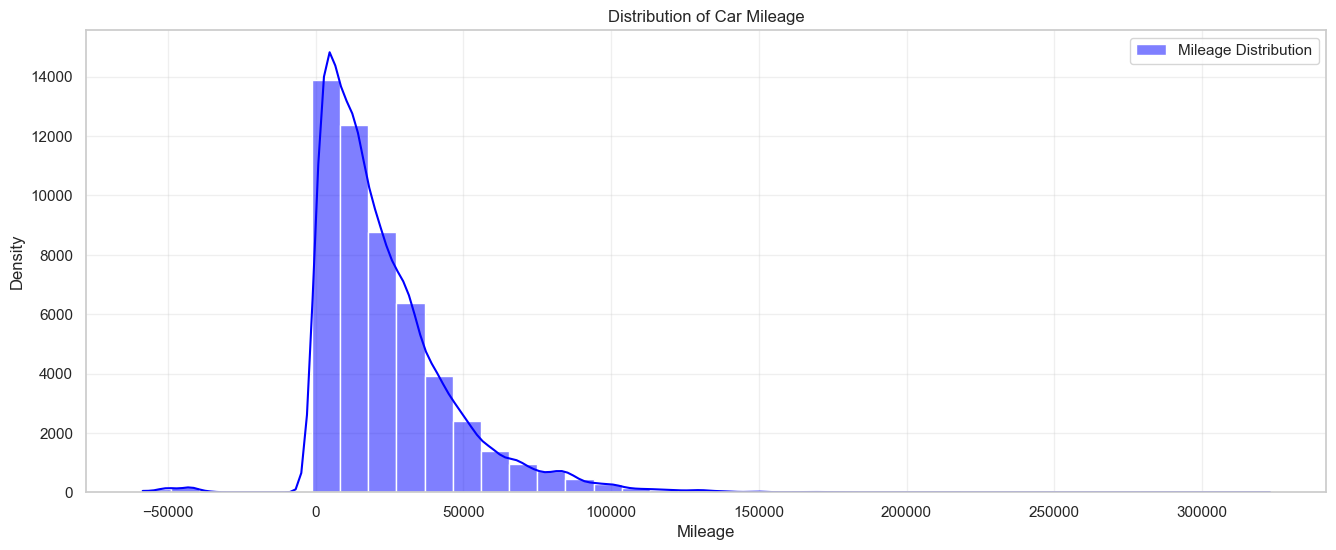

In [337]:
# Seeing the distribution in X_train
plt.figure(figsize=(16, 6))
sns.histplot(X_train['mileage'], kde=True, color="blue", label="Mileage Distribution", bins=40)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [338]:
# Fill missing mileage values with median
median_mileage = X_train['mileage'].median()
X_train['mileage'].fillna(median_mileage, inplace=True)
X_val['mileage'].fillna(median_mileage, inplace=True)
test['mileage'].fillna(median_mileage, inplace=True)

In [339]:
X_train['mileage'].describe()

count     53172.000000
mean      22839.561652
std       21913.576987
min      -58540.574478
25%        7627.500000
50%       17289.000000
75%       32000.000000
max      323000.000000
Name: mileage, dtype: float64

In [340]:
X_val['mileage'].describe()

count     22792.000000
mean      23027.492683
std       21968.920249
min      -58540.574478
25%        7577.500000
50%       17289.000000
75%       32164.500000
max      259000.000000
Name: mileage, dtype: float64

In [341]:
test['mileage'].describe()

count     32567.000000
mean      22832.836371
std       21912.538445
min      -58540.574478
25%        7500.000000
50%       17289.000000
75%       32031.500000
max      279000.000000
Name: mileage, dtype: float64

In [342]:
# Identifying negative mileage rows
negative_mileage_rows = X_train[X_train['mileage'] < 0]
print(f"Number of rows with negative mileage: {negative_mileage_rows.shape[0]}")
print(negative_mileage_rows.head())

Number of rows with negative mileage: 271
            Brand    model transmission       mileage fuelType    tax   mpg  \
carID                                                                         
19207        Ford    focus       Manual -42650.453719   Petrol  145.0  60.1   
37025    Mercedes  c class    Semi-auto -50755.210230   Diesel   30.0  64.2   
42196    Mercedes  c class    Automatic -50755.210230   Petrol  205.0  39.8   
5043         Audi       a5    Semi-auto -52618.457894   Petrol  145.0  39.2   
69232  Volkswagen   touran       Manual -48190.655673   Diesel  125.0  61.4   

       engineSize  paintQuality%  previousOwners  Brand_encoded  \
carID                                                             
19207         1.0           64.0             1.0            2.0   
37025         1.6            NaN             0.0            4.0   
42196         1.8           68.0             0.0            4.0   
5043          2.0           49.0             1.0            0.0   
69

After further investigation, it was first decided to remove the rows **with negative mileage values** from the dataset. This decision was based on some key considerations. After some research, the group found that a negative mileage could mean that a scheduled maintenance item, such as an oil change, is overdue (https://techinfo.honda.com/rjanisis/pubs/om/NA0707/NA0707O00210A.pdf page 4). 

The interpretation of negative mileage as an indicator of overdue maintenance appears to be specific to Honda vehicles and their proprietary maintenance tracking systems. However, the dataset shows negative mileage values across multiple brands including Ford, Mercedes, Audi, and Volkswagen, but notably no Honda vehicles. Without brand-specific documentation or consistent patterns across manufacturers, the group cannot reliably interpret what these negative values represent for non-Honda vehicles.

Given this uncertainty and the fundamental data quality principle that mileage should be a non-negative metric, removing these ambiguous records is the most conservative approach.

**UPDATE**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [343]:
# X_train = X_train[X_train['mileage'] >= 0]
# X_val = X_val[X_val['mileage'] >= 0]
# test = test[test['mileage'] >= 0]

# Apllying Kaggle rule 
for df in [X_train, X_val, test]:
    df.loc[df['mileage'] < 0, 'mileage'] = np.nan
    
X_train['mileage'].describe()

count     52901.000000
mean      23197.798243
std       21384.865217
min           1.000000
25%        7800.000000
50%       17289.000000
75%       32069.000000
max      323000.000000
Name: mileage, dtype: float64

__`'tax' variable`__

In [344]:
print(X_train['tax'].describe())

count    47691.000000
mean       119.815203
std         65.131394
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


In [345]:
print(X_val['tax'].describe())

count    20371.000000
mean       121.524870
std         66.420744
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


In [346]:
print(test['tax'].describe())

count    29259.000000
mean       120.569239
std         65.560570
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


The `tax` variable represents the annual road tax (in £) applicable to each car. Since negative values are not realistic, all negative tax values were replaced with NaN. 

To better capture the underlying tax structure, missing values were imputed based on `fuelType` and `engineSize` (https://www.gov.uk/vehicle-tax-rate-tables).  

Cars with larger engines and certain fuel types (e.g., diesel) tend to have higher road taxes, so imputing the median tax within each (`fuelType`, `engineSize`) group leads to more realistic and data-driven estimates. When a specific combination was missing from the training set, the global median tax was used as a fallback.

In [347]:
X_train.loc[X_train['tax'] < 0, 'tax'] = np.nan
X_val.loc[X_val['tax'] < 0, 'tax'] = np.nan
test.loc[test['tax'] < 0, 'tax'] = np.nan

In [348]:
# Compute median tax per (fuelType, engineSize)
tax_medians = X_train.groupby(['fuelType', 'engineSize'])['tax'].median()

def impute_tax(row):
    if pd.isna(row['tax']):
        key = (row['fuelType'], row['engineSize'])
        if key in tax_medians.index:
            return tax_medians.loc[key]
        else:
            return X_train['tax'].median()  # fallback global median
    else:
        return row['tax']

X_train['tax'] = X_train.apply(impute_tax, axis=1)
X_val['tax'] = X_val.apply(impute_tax, axis=1)
test['tax'] = test.apply(impute_tax, axis=1)

print("Remaining missing values in tax (X_train):", X_train['tax'].isna().sum())
print("Remaining missing values in tax (X_val):", X_val['tax'].isna().sum())
print("Remaining missing values in tax (test):", test['tax'].isna().sum())

Remaining missing values in tax (X_train): 6
Remaining missing values in tax (X_val): 0
Remaining missing values in tax (test): 0


In [349]:
# Fill remaining NaN with global median
global_median_tax = X_train['tax'].median()
X_train['tax'].fillna(global_median_tax, inplace=True)

print("Remaining missing values in tax (train):", X_train['tax'].isna().sum())

Remaining missing values in tax (train): 0


__`'mpg' variable`__

In [350]:
print(X_train['mpg'].describe())

count    47664.000000
mean        55.174129
std         16.410513
min        -43.421768
25%         47.100000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


In [351]:
print(X_val['mpg'].describe())

count    20376.000000
mean        55.103656
std         16.701461
min        -43.421768
25%         46.300000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


In [352]:
print(test['mpg'].describe())

count    29279.000000
mean        55.210728
std         17.644635
min        -43.421768
25%         46.300000
50%         54.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64


The `mpg` variable (average miles per gallon) initially contained 10.37% missing values and negative values, which are not realistic. To clean the data:
- Negative values were removed, as they are invalid.
- Missing values were imputed using the **median** of the training set, preserving the overall distribution without being affected by outliers.

In [353]:
print(f"Negative values: {(X_train['mpg'] < 0).sum()}")

Negative values: 25


**UPDATE**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0, `engineSize` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [354]:
# X_train = X_train[X_train['mpg'] >= 0]
# X_val = X_val[X_val['mpg'] >= 0]
# test = test[test['mpg'] >= 0]

for df in [X_train, X_val, test]:
    df.loc[df['mpg'] <= 0, 'mpg'] = np.nan

In [355]:
mpg_median = X_train['mpg'].median()
X_train['mpg'] = X_train['mpg'].fillna(mpg_median)
X_val['mpg'] = X_val['mpg'].fillna(mpg_median)
test['mpg'] = test['mpg'].fillna(mpg_median)

In [356]:
print(f"Remaining missing values in mpg (train): {X_train['mpg'].isna().sum()}")
print(f"Remaining missing values in mpg (val): {X_val['mpg'].isna().sum()}")
print(f"Remaining missing values in mpg (test): {test['mpg'].isna().sum()}")

Remaining missing values in mpg (train): 0
Remaining missing values in mpg (val): 0
Remaining missing values in mpg (test): 0


__`'engineSize' variable`__

In [357]:
print(X_train['engineSize'].describe())

count    52098.000000
mean         1.658587
std          0.570474
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.200000
Name: engineSize, dtype: float64


In [358]:
print(X_val['engineSize'].describe())

count    22350.000000
mean         1.663870
std          0.580413
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


In [359]:
print(test['engineSize'].describe())

count    31939.000000
mean         1.665377
std          0.574467
min         -0.103493
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


- Removed negative values and equal to 0, as they are physically meaningless.  
- Imputed missing values using the median, which is robust to outliers.

In [360]:
# Number of rows with negative engineSize
X_train[X_train['engineSize'] < 0].shape[0]

57

In [361]:
# Number of rows with 0L engineSize
X_train[X_train['engineSize'] == 0].shape[0]

131

**UPDATE**: During the Feature Engineering phase, physically inconsistent data points (`mileage` < 0, `mpg` < 0, `engineSize` < 0) were filtered from the training and validation sets to ensure model quality. This filtering was inadvertently applied to the test set as well, reducing its size. Since the Kaggle submission file must include a prediction for every original `carID`, the size mismatch caused the submission to fail. So, to resolve this and avoid model failure, the rows were imputed with a conservative value of 0. 

In [362]:
# Remove rows with negative engine size
# X_train = X_train[X_train['engineSize'] > 0]
# X_val = X_val[X_val['engineSize'] > 0]
# test = test[test['engineSize'] > 0]

In [363]:
for df in [X_train, X_val, test]:
    df.loc[df['engineSize'] <= 0, 'engineSize'] = np.nan

In [364]:
median_engine = X_train['engineSize'].median()
X_train['engineSize'].fillna(median_engine, inplace=True)
X_val['engineSize'].fillna(median_engine, inplace=True)
test['engineSize'].fillna(median_engine, inplace=True)

In [365]:
print(f"Remaining missing values in engineSize (train): {X_train['engineSize'].isna().sum()}")
print(f"Remaining missing values in engineSize (val): {X_val['engineSize'].isna().sum()}")
print(f"Remaining missing values in engineSize (test): {test['engineSize'].isna().sum()}")

Remaining missing values in engineSize (train): 0
Remaining missing values in engineSize (val): 0
Remaining missing values in engineSize (test): 0


In [366]:
print(X_train['engineSize'].describe())

count    53172.000000
mean         1.663172
std          0.555717
min          0.154529
25%          1.300000
50%          1.600000
75%          2.000000
max          6.200000
Name: engineSize, dtype: float64


In [367]:
print(X_val['engineSize'].describe())

count    22792.000000
mean         1.668089
std          0.566364
min          0.154529
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


In [368]:
print(test['engineSize'].describe())

count    32567.000000
mean         1.670411
std          0.559135
min          0.154529
25%          1.300000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64


__`'paintQuality%' variable`__

In [369]:
print(X_train['paintQuality%'].describe())

count    52083.000000
mean        64.630156
std         21.048210
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        125.594308
Name: paintQuality%, dtype: float64


In [370]:
print(X_val['paintQuality%'].describe())

count    22357.000000
mean        64.502177
std         20.957298
min          1.638913
25%         47.000000
50%         64.000000
75%         82.000000
max        125.594308
Name: paintQuality%, dtype: float64


In [371]:
print(test['paintQuality%'].describe())

count    31942.000000
mean        64.446667
std         21.142188
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        125.594308
Name: paintQuality%, dtype: float64


In [372]:
# Check for values outside 0-100 range
out_of_bounds = X_train[(X_train['paintQuality%'] < 0) | (X_train['paintQuality%'] > 100)]
print(f"Number of out-of-bounds paintQuality% values: {out_of_bounds.shape[0]}")
print(out_of_bounds[['paintQuality%']].reset_index()[['carID','paintQuality%']].head())

Number of out-of-bounds paintQuality% values: 264
   carID  paintQuality%
0  62188     125.003773
1  23930     125.109951
2  60737     125.003773
3  54470     125.594308
4  71537     125.366507


In [373]:
out_of_bounds_val = X_val[(X_val['paintQuality%'] < 0) | (X_val['paintQuality%'] > 100)]
print(f"Number of out-of-bounds paintQuality% values: {out_of_bounds_val.shape[0]}")
print(out_of_bounds_val[['paintQuality%']].reset_index()[['carID','paintQuality%']].head())

Number of out-of-bounds paintQuality% values: 103
   carID  paintQuality%
0  46688     125.202033
1  45673     125.202033
2  25667     125.109951
3  75768     125.366507
4   8498     125.569499


In [374]:
out_of_bounds_test = test[(test['paintQuality%'] < 0) | (test['paintQuality%'] > 100)]
print(f"Number of out-of-bounds paintQuality% values: {out_of_bounds_test.shape[0]}")
print(out_of_bounds_test[['paintQuality%']].reset_index()[['carID','paintQuality%']].head())

Number of out-of-bounds paintQuality% values: 168
    carID  paintQuality%
0   82849     125.109951
1  102729     125.003773
2   89325     125.109951
3   78622     125.301945
4   81359     125.569499


In [375]:
# Check paintQuality% values strictly between 101 and 124
between_101_124 = X_train[(X_train['paintQuality%'] > 100) & (X_train['paintQuality%'] < 125)]
print(f"Number of values between 101% and 124%: {between_101_124.shape[0]}")
print(between_101_124[['paintQuality%']].value_counts().sort_index())

Number of values between 101% and 124%: 0
Series([], Name: count, dtype: int64)


In [376]:
between_101_124_val = X_val[(X_val['paintQuality%'] > 100) & (X_val['paintQuality%'] < 125)]
print(f"Number of values between 101% and 124%: {between_101_124_val.shape[0]}")
print(between_101_124_val[['paintQuality%']].value_counts().sort_index())

# All values above 100% are >= 125%, no values between 101-124%

Number of values between 101% and 124%: 0
Series([], Name: count, dtype: int64)


In [377]:
between_101_124_test = test[(test['paintQuality%'] > 100) & (test['paintQuality%'] < 125)]
print(f"Number of values between 101% and 124%: {between_101_124_test.shape[0]}")
print(between_101_124_test[['paintQuality%']].value_counts().sort_index())

Number of values between 101% and 124%: 0
Series([], Name: count, dtype: int64)


The `paintQuality%` feature should logically range between 0% and 100%. The group observed that some values slightly exceed 100%, likely due to data entry or measurement errors. Instead of dropping these rows, the group choose to **truncate** any value above 100% to exactly 100%. This ensures all values remain within the expected bounds while preserving most of the data.

In [378]:
X_train['paintQuality%'] = X_train['paintQuality%'].clip(upper=100)
X_val['paintQuality%'] = X_val['paintQuality%'].clip(upper=100)
test['paintQuality%'] = test['paintQuality%'].clip(upper=100)

In [379]:
# Replace missing values with the median 
median_paint = X_train['paintQuality%'].median()
X_train['paintQuality%'] = X_train['paintQuality%'].fillna(median_paint)
X_val['paintQuality%'] = X_val['paintQuality%'].fillna(median_paint)
test['paintQuality%'] = test['paintQuality%'].fillna(median_paint)

In [380]:
print(X_train['paintQuality%'].describe())

count    53172.000000
mean        64.512348
std         20.540353
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        100.000000
Name: paintQuality%, dtype: float64


In [381]:
print(X_val['paintQuality%'].describe())

count    22792.000000
mean        64.397462
std         20.489584
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        100.000000
Name: paintQuality%, dtype: float64


In [382]:
print(test['paintQuality%'].describe())

count    32567.000000
mean        64.326902
std         20.635839
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        100.000000
Name: paintQuality%, dtype: float64


__`'previousOwners' variable`__

In [383]:
print(X_train['previousOwners'].describe())

count    52044.000000
mean         1.998058
std          1.473462
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64


In [384]:
print(X_val['previousOwners'].describe())

count    22370.000000
mean         1.985993
std          1.471747
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64


In [385]:
print(test['previousOwners'].describe())

count    31970.000000
mean         2.006118
std          1.472310
min         -2.345650
25%          1.000000
50%          2.000000
75%          3.000000
max          6.258371
Name: previousOwners, dtype: float64


In [386]:
# Count negative values in previousOwners
print((X_train['previousOwners'] < 0).sum())
print((X_val['previousOwners'] < 0).sum())
print((test['previousOwners'] < 0).sum())

258
113
168


The `previousOwners` feature represents the number of previous owners. Since this must be a non-negative integer, the group decided to remove negative values, round decimals to the nearest integer, and impute missing values (~2.1%) with the median.

In [387]:
# Remove negative values
X_train = X_train[X_train['previousOwners'] >= 0]
X_val = X_val[X_val['previousOwners'] >= 0]
# test = test[test['previousOwners'] >= 0]

In [388]:
for df_name, df in zip(['X_train', 'X_val', 'test'], [X_train, X_val, test]):
    if 'previousOwners' in df.columns:
        # Replace infinite values (if any)
        df['previousOwners'] = df['previousOwners'].replace([np.inf, -np.inf], np.nan)
        # Fill NaN values 
        df['previousOwners'].fillna(0, inplace=True)
        # Round and convert to int
        df['previousOwners'] = df['previousOwners'].round().astype(int)
    else:
        print(f"'previousOwners' column not found in {df_name}.")

In [389]:
# Round decimals to nearest integer
X_train['previousOwners'] = X_train['previousOwners'].round().astype(int)
X_val['previousOwners'] = X_val['previousOwners'].round().astype(int)
test['previousOwners'] = test['previousOwners'].round().astype(int)

In [390]:
# Impute missing values with median
median_prev_owners = X_train['previousOwners'].median()
X_train['previousOwners'].fillna(median_prev_owners, inplace=True)
X_val['previousOwners'].fillna(median_prev_owners, inplace=True)
test['previousOwners'].fillna(median_prev_owners, inplace=True)

In [391]:
print(X_train['previousOwners'].describe())

count    51786.000000
mean         2.018422
std          1.441548
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


In [392]:
print(X_val['previousOwners'].describe())

count    22257.000000
mean         2.006739
std          1.439547
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


In [393]:
print(test['previousOwners'].describe())

count    32567.000000
mean         1.969755
std          1.474998
min         -2.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64


## Outlier detection and its visualization

Outliers can significantly influence the predictive performance, especially in regression tasks. So, the group decided to use the **Interquartile Range (IQR) method** to detect extreme values. The IQR is defined as Q3 - Q1, where Q1 and Q3 are the 25th and 75th percentiles, respectively. **Outliers** are the observations that fall:
<br>
- below $Q_1 − 1.5 \times IQR$

or

- above $Q_3 + 1.5 \times IQR$

The group focused on the continuous numeric variables: `tax`, `mpg`, `engineSize`, `paintQuality%`, `previousOwners`, `car_age` and `mileage_km`.

In [394]:
# Detecting outliers using the IQR Method
def detect_outliers_iqr(data, column):
    data_no_na = data.dropna(subset=[column])
    Q1 = data_no_na[column].quantile(0.25)
    Q3 = data_no_na[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data_no_na[(data_no_na[column] < lower_limit) | (data_no_na[column] > upper_limit)]
    return outliers, lower_limit, upper_limit

# Visualizing outliers
def visualize_outliers(data, column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Boxplot Graph
    sns.boxplot(x=data[column], ax=axs[0])
    axs[0].set_title(f'Boxplot of {column}', fontsize=11)

    # Histogram Graph
    sns.histplot(data[column], kde=True, ax=axs[1])
    axs[1].set_title(f'Distribution of {column}', fontsize=11)

    # Add vertical lines for IQR boundaries
    outliers, lower, upper = detect_outliers_iqr(data, column)
    axs[1].axvline(lower, color='red', linestyle='--', alpha=0.7, label=f'Lower limit: {lower:.2f}')
    axs[1].axvline(upper, color='red', linestyle='--', alpha=0.7, label=f'Upper limit: {upper:.2f}')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


Column: mileage
Number of outliers: 1473 (4.52% of data)
Lower limit: -29152.50
Upper limit: 68923.50


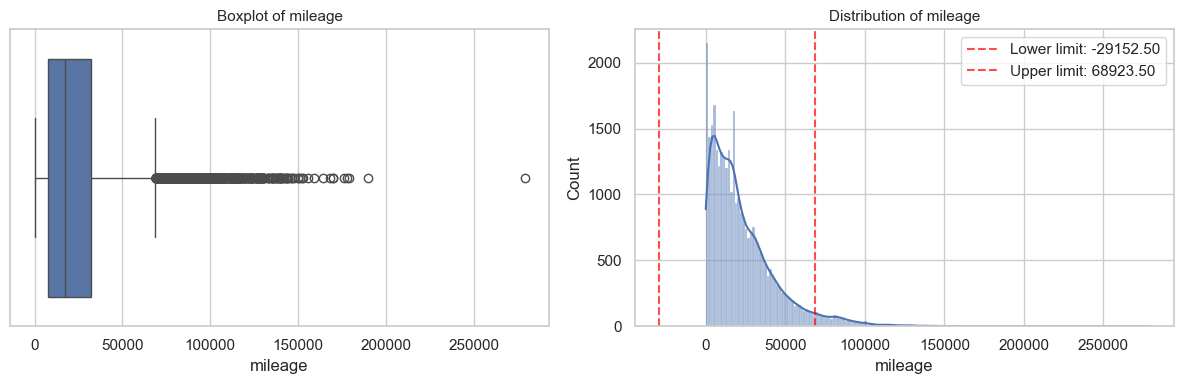


Column: tax
Number of outliers: 8583 (26.35% of data)
Lower limit: 95.00
Upper limit: 175.00


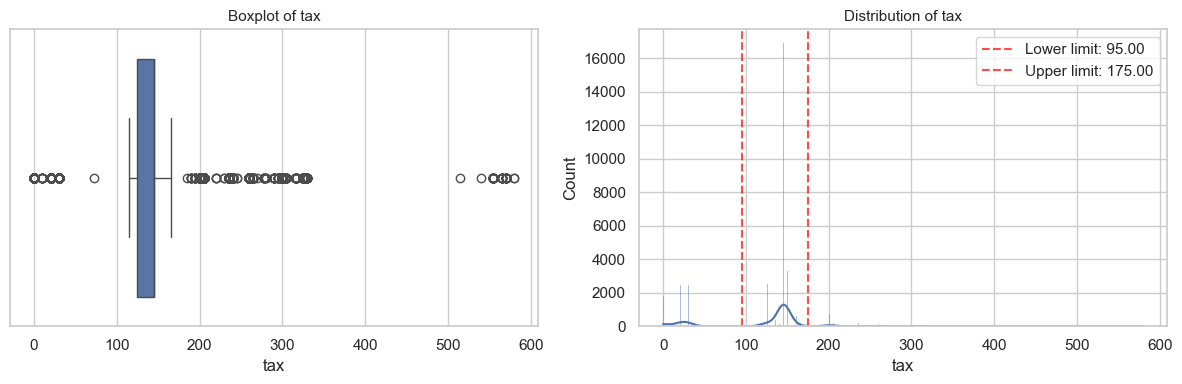


Column: mpg
Number of outliers: 740 (2.27% of data)
Lower limit: 25.65
Upper limit: 82.85


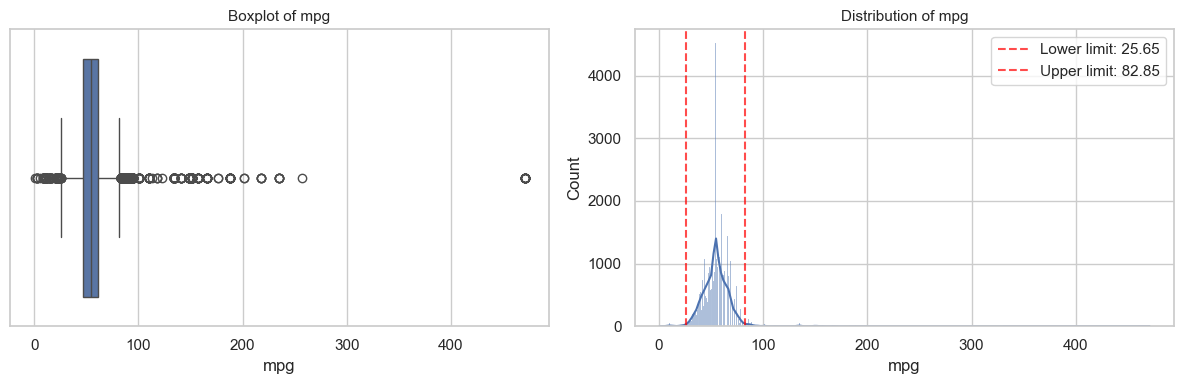


Column: engineSize
Number of outliers: 354 (1.09% of data)
Lower limit: 0.25
Upper limit: 3.05


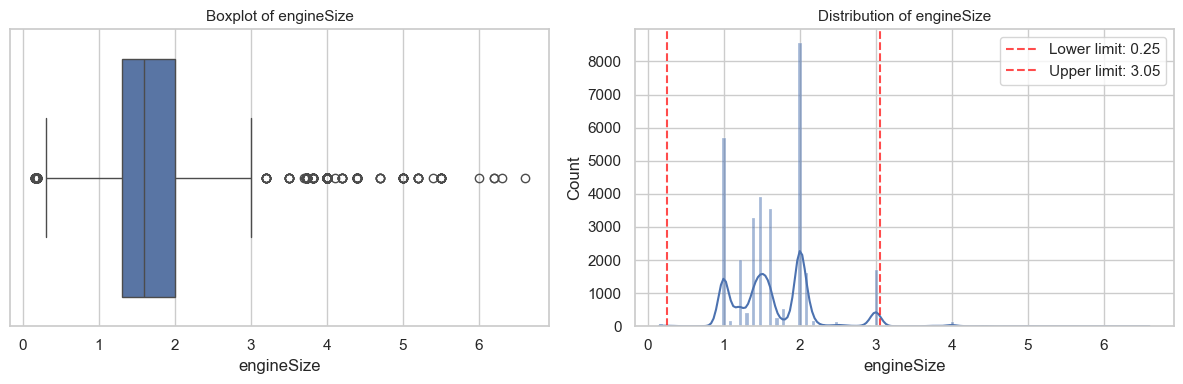


Column: paintQuality%
Number of outliers: 0 (0.00% of data)
Lower limit: -5.50
Upper limit: 134.50


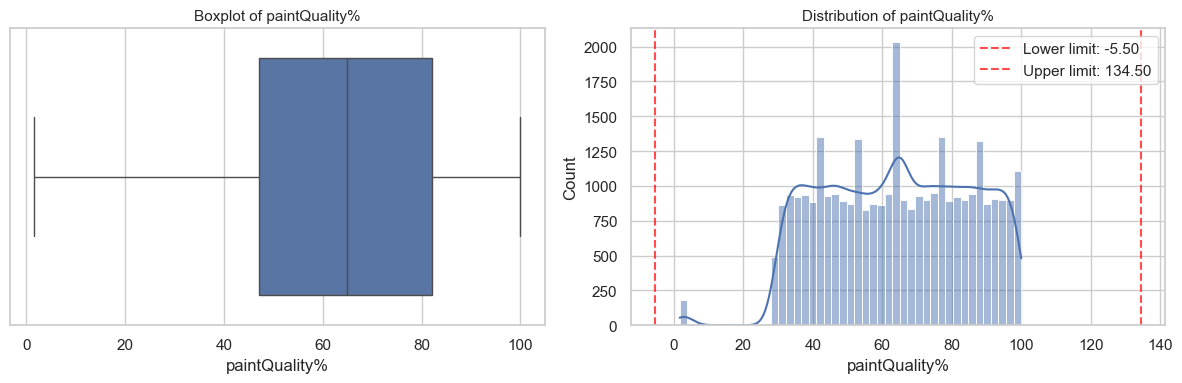


Column: previousOwners
Number of outliers: 0 (0.00% of data)
Lower limit: -2.00
Upper limit: 6.00


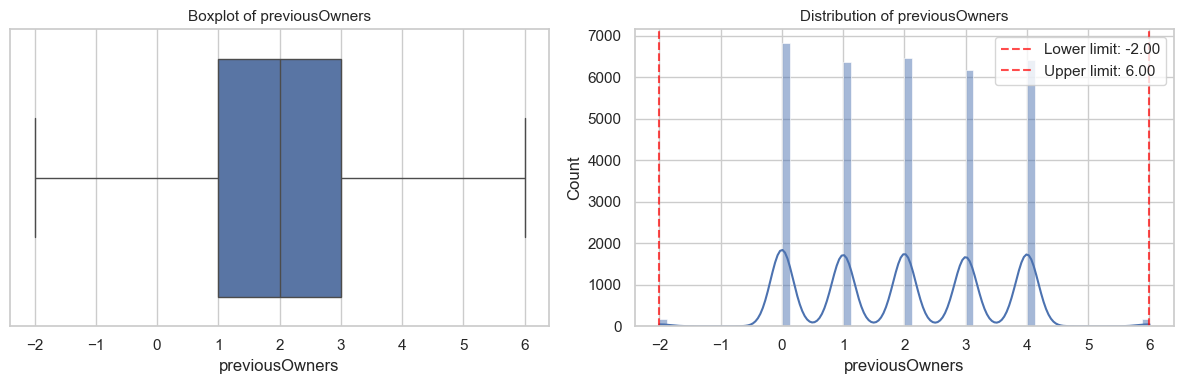


Column: Brand_encoded
Number of outliers: 0 (0.00% of data)
Lower limit: -5.50
Upper limit: 14.50


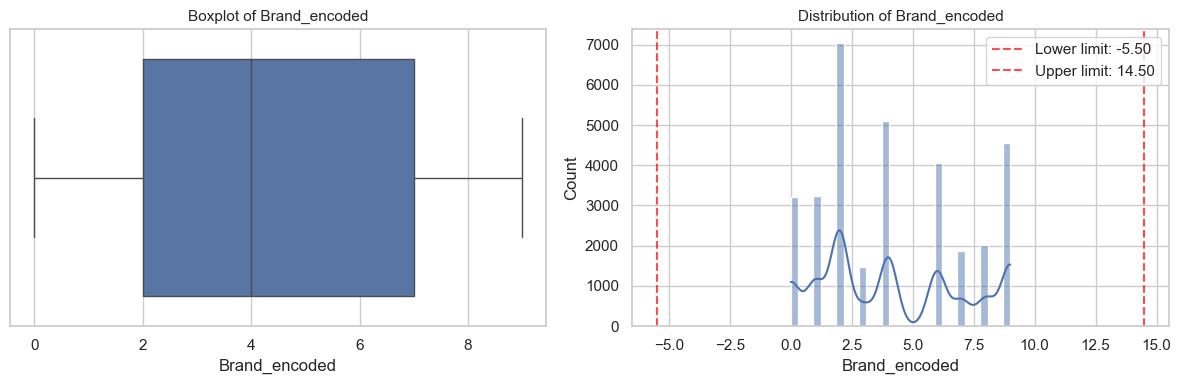


Column: model_encoded
Number of outliers: 0 (0.00% of data)
Lower limit: -89.00
Upper limit: 239.00


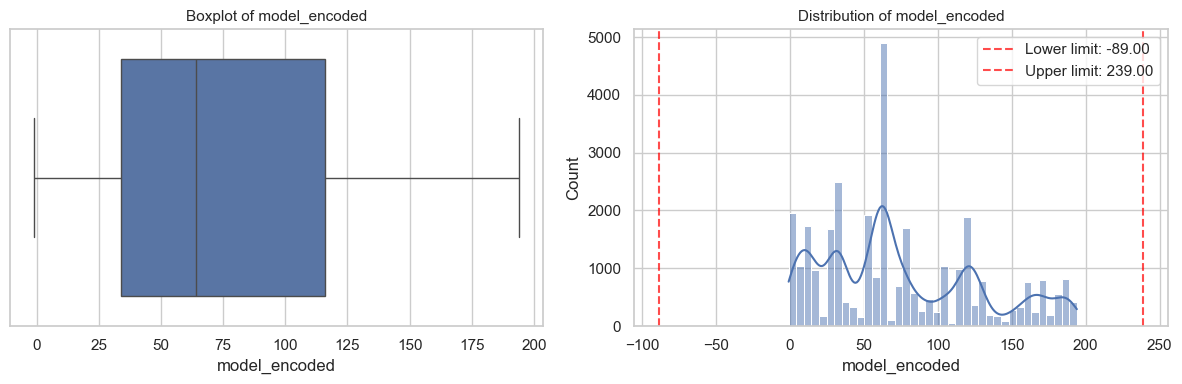


Column: car_age
Number of outliers: 789 (2.42% of data)
Lower limit: 1.50
Upper limit: 13.50


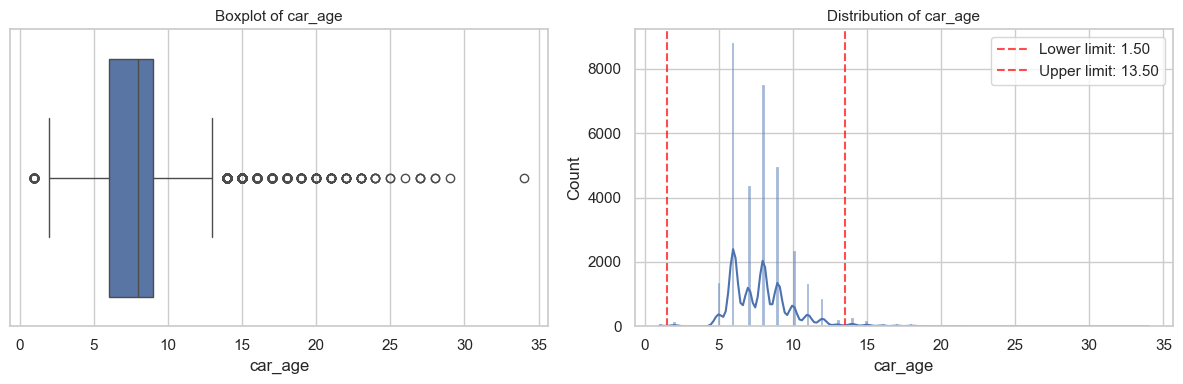

In [395]:
# Select only continuous numeric variables (ignore binary ones)
numeric_columns = [
    col for col in test.select_dtypes(include=np.number).columns
    if test[col].nunique() > 5
]

# Loop through each numeric column
for col in numeric_columns:
    print(f"\nColumn: {col}")
    outliers, lower, upper = detect_outliers_iqr(test, col)
    num_outliers = len(outliers)
    total = len(test)
    percentage_outliers = (num_outliers / total) * 100

    print(f"Number of outliers: {num_outliers} ({percentage_outliers:.2f}% of data)")
    print(f"Lower limit: {lower:.2f}")
    print(f"Upper limit: {upper:.2f}")

    visualize_outliers(test, col)

The **outlier analysis** revealed that the majority of variables contained a small percentage of statistical outliers, often corresponding to physically valid, yet extreme, observations. For instance:
- `engineSize` and `car_age` presented outliers (1.08% and 2.38%, respectively) that primarily represent unusually large engines or older vehicles, which are genuine characteristics of the target population.
- Similarly, the `tax` variable showed the highest count of outliers, at 28.60% of the data, which it was logarithmic transformed later.

However, some anomalies were identified as *potential data entry errors* or *values violating physical constraints*. 
- The `mpg` variable, for example, contained extreme values (up to 470.8 mpg) which are unrealistic and will require cleaning.
- Furthermore, some IQR calculations resulted in physically impossible limits for variables such as `previousOwners` (a negative number of owners) and mileage (negative distance), necessitating the practical adjustment of the lower bounds to zero (0).
- The `paintQuality%` variable also showed an impossible theoretical range, with its practical boundaries being limited to [0,100].

Given that the objective is to build a robust model to reflect real-world vehicle pricing, and acknowledging that some modeling techniques are naturally less sensitive to statistical outliers, the strategy is to retain the statistically extreme values that correspond to valid vehicle characteristics (e.g., high tax, large engine size). Conversely, the suspect data entry errors, such as unrealistic mpg values, were addressed during the initial data cleaning and preprocessing phase and limits are going to be made. 

### Logarithmic transformation 

The variable `tax` was found to have a highly skewed and multi-modal distribution, with statistical outliers ranging from £0 to £580. A check was conducted to validate these extreme values (www.gov.uk/vehicle-tax-rate-tables):

- *Minimum (£0)*: This value is valid and represents tax-exempt vehicles (such as electric cars or certain highly efficient/classic vehicles) under the UK VED system in 2020.
- *Maximum (£580)*: This value is also validated by the UK's vehicle's tax tables. It corresponds to high-emission vehicles registered before April 2017 (which could incur rates up to £760 in the highest bands), or to the sum of the standard rate plus the £320 'Expensive Car Supplement' for vehicles with a list price over £40,000.

Since these values are essential and valid predictors of vehicle value (indicating luxury, age, or environmental class), removing them was not a viable option. So, to stabilize the variance of this skewed feature and converting it into a more near-normal shape and mitigate the disproportionate influence of its extreme values, the **logarithmic transformation** log(1+x) was applied, creating the new feature `log_tax`.

`log_tax`

In [396]:
tax_median = X_train['tax'].median()
print(f"Median 'tax' (for imputation): {tax_median}")

for df in [X_train, X_val, test]:
    df['tax'].fillna(tax_median, inplace=True)

# Apply np.log1p transformation and remove the original column
for df in [X_train, X_val, test]:
    df['log_tax'] = np.log1p(df['tax'])
    # Remove the original 'tax' column
    # df.drop(columns=['tax'], inplace=True)

Median 'tax' (for imputation): 145.0


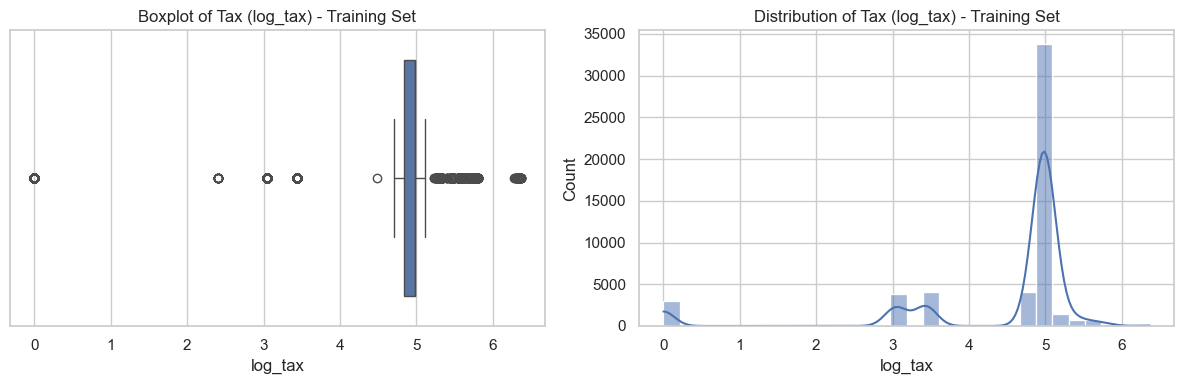


Descriptive statistics for X_train['log_tax']:
count    51786.000000
mean         4.451661
std          1.279449
min          0.000000
25%          4.836282
50%          4.983607
75%          4.983607
max          6.364751
Name: log_tax, dtype: float64


In [397]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_tax'])
plt.title('Boxplot of Tax (log_tax) - Training Set')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_tax'], kde=True, bins=30)
plt.title('Distribution of Tax (log_tax) - Training Set')
plt.xlabel('log_tax')

plt.tight_layout()
# plt.savefig('log_tax_distribution_transformed.png')
plt.show()

print("\nDescriptive statistics for X_train['log_tax']:")
print(X_train['log_tax'].describe())

The `mileage` attribute was also observed to have a pronounced right-skewed distribution, a common characteristic of usage metrics, consisting mainly of low-mileage vehicles with a long tail of high-mileage outliers. </p>
So, to counteract this without discarding valid data points, the **logarithmic transformation** was applied, resulting in the new feature `log_mileage`. This transformation effectively compresses the scale of high values while preserving low values, thereby achieving variance stabilization.

`log_mileage`

In [398]:
# Apply np.log1p transformation 
for df in [X_train, X_val, test]:
    df['log_mileage'] = np.log1p(df['mileage'])
    # Remove the original 'mileage_km' column
    # df.drop(columns=['mileage'], inplace=True)

In [399]:
print(f"NaN count in log_mileage (before imputation) for current DF: {df['log_mileage'].isna().sum()}")

NaN count in log_mileage (before imputation) for current DF: 170


In [400]:
# Calculate the median of the newly created log_engineSize in the training set
median_log_mileage = X_train['log_mileage'].median()
for df in [X_train, X_val, test]:
    # Fill NaNs using the median calculated from X_train
    df['log_mileage'].fillna(median_log_mileage, inplace=True)

print(f"NaN count in log_mileage (after imputation) in test: {test['log_mileage'].isna().sum()}")

NaN count in log_mileage (after imputation) in test: 0


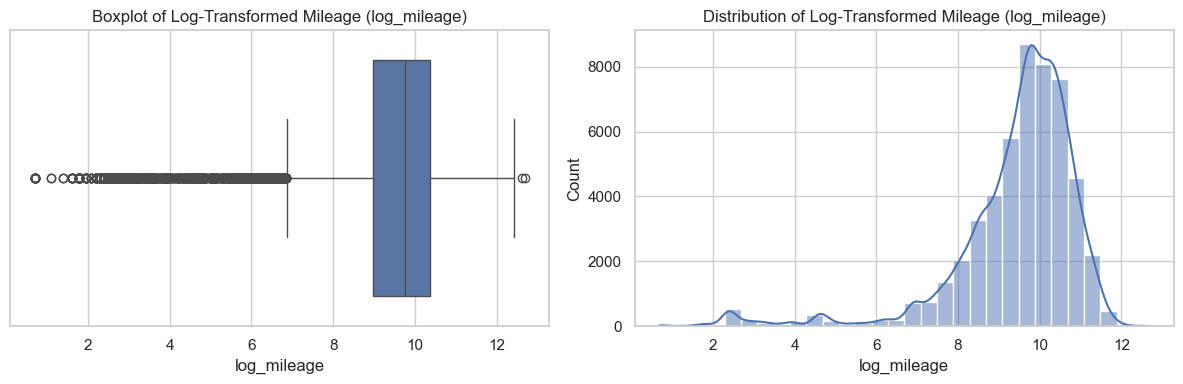


Descriptive statistics for X_train['log_mileage']:
count    51786.000000
mean         9.453565
std          1.516918
min          0.693147
25%          8.967440
50%          9.757884
75%         10.373522
max         12.685411
Name: log_mileage, dtype: float64


In [401]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_mileage'])
plt.title('Boxplot of Log-Transformed Mileage (log_mileage)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_mileage'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Mileage (log_mileage)')
plt.xlabel('log_mileage')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_mileage']:")
print(X_train['log_mileage'].describe())

The `mpg` feature, which represents a car's fuel efficiency, exhibits a severely right-skewed distribution. While the percentage of statistical outliers in the current dataset (1.62% by IQR) is minimal, the physical and statistical nature of the variable necessitates a transformation. 

To improve model performance, particularly for linear regression and other methods sensitive to skewed distributions, and to linearize this inverse relationship, the logarithmic transformation (**log(x)**) was applied to create the new feature `log_mpg`. This procedure effectively compresses the scale of high mpg values and expands the separation between low values.

`log_mpg`

In [402]:
# Apply the log transformation (np.log)
for df in [X_train, X_val, test]:
    df['log_mpg'] = np.log(df['mpg'])

median_log_mpg = X_train['log_mpg'].median()
print(f"Median log_mileage from X_train (for imputation): {median_log_mpg:.4f}")
    # Remove original 'mpg' column
    # df.drop(columns=['mpg'], inplace=True)

Median log_mileage from X_train (for imputation): 3.9945


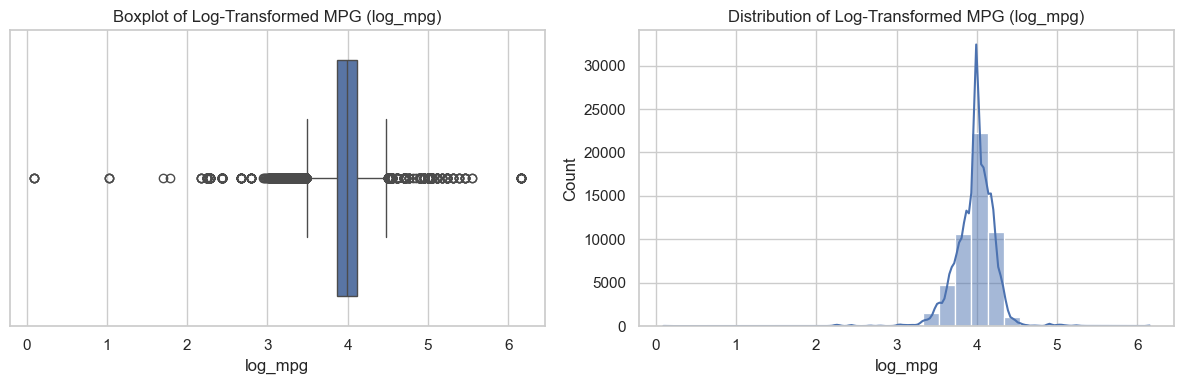


Descriptive statistics for X_train['log_mpg']:
count    51786.000000
mean         3.980208
std          0.244214
min          0.095310
25%          3.864931
50%          3.994524
75%          4.117410
max          6.154433
Name: log_mpg, dtype: float64


In [403]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_mpg'])
plt.title('Boxplot of Log-Transformed MPG (log_mpg)')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_mpg'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed MPG (log_mpg)')
plt.xlabel('log_mpg')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_mpg']:")
print(X_train['log_mpg'].describe())

Finally, the `engineSize` feature, which represents a car's size of engine in liters, was also logarithmic transformed (**log(x)**) was applied to create the new feature `log_engineSize`. 

`log_engineSize`

In [404]:
for df in [X_train, X_val, test]:
    df['log_engineSize'] = np.log(df['engineSize'])
    # Check for NaNs created by the log transformation
    print(f"NaN count in log_engineSize (before imputation) for current DF: {df['log_engineSize'].isna().sum()}")

NaN count in log_engineSize (before imputation) for current DF: 0
NaN count in log_engineSize (before imputation) for current DF: 0
NaN count in log_engineSize (before imputation) for current DF: 0


In [405]:
# Calculate the median of the newly created log_engineSize in the training set
median_log_engineSize = X_train['log_engineSize'].median()
for df in [X_train, X_val, test]:
    # Fill NaNs using the median calculated from X_train
    df['log_engineSize'].fillna(median_log_engineSize, inplace=True)

print(f"NaN count in log_engineSize (after imputation) in test: {test['log_engineSize'].isna().sum()}")

NaN count in log_engineSize (after imputation) in test: 0


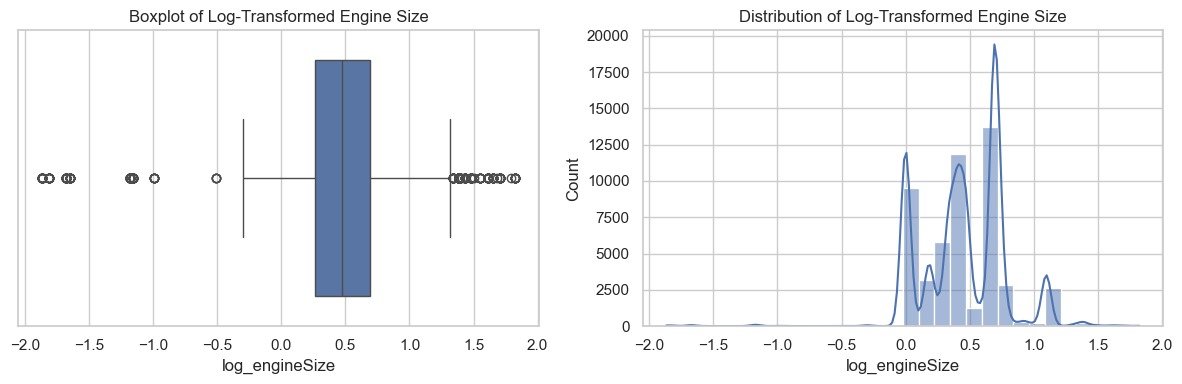


Descriptive statistics for X_train['log_engineSize']:
count    51786.000000
mean         0.456352
std          0.329024
min         -1.867371
25%          0.262364
50%          0.470004
75%          0.693147
max          1.824549
Name: log_engineSize, dtype: float64


In [406]:
# Visualize the new distribution in X_train
plt.figure(figsize=(12, 4))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_train['log_engineSize'])
plt.title('Boxplot of Log-Transformed Engine Size')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(x=X_train['log_engineSize'], kde=True, bins=30)
plt.title('Distribution of Log-Transformed Engine Size')
plt.xlabel('log_engineSize')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for X_train['log_engineSize']:")
print(X_train['log_engineSize'].describe())

## Data Visualization 

In [407]:
metric_features = ["log_tax", "log_mpg", "engineSize", "paintQuality%", "previousOwners", "car_age", "log_mileage"]
non_metric_features = ["Brand", "model", "transmission", "fuelType"]

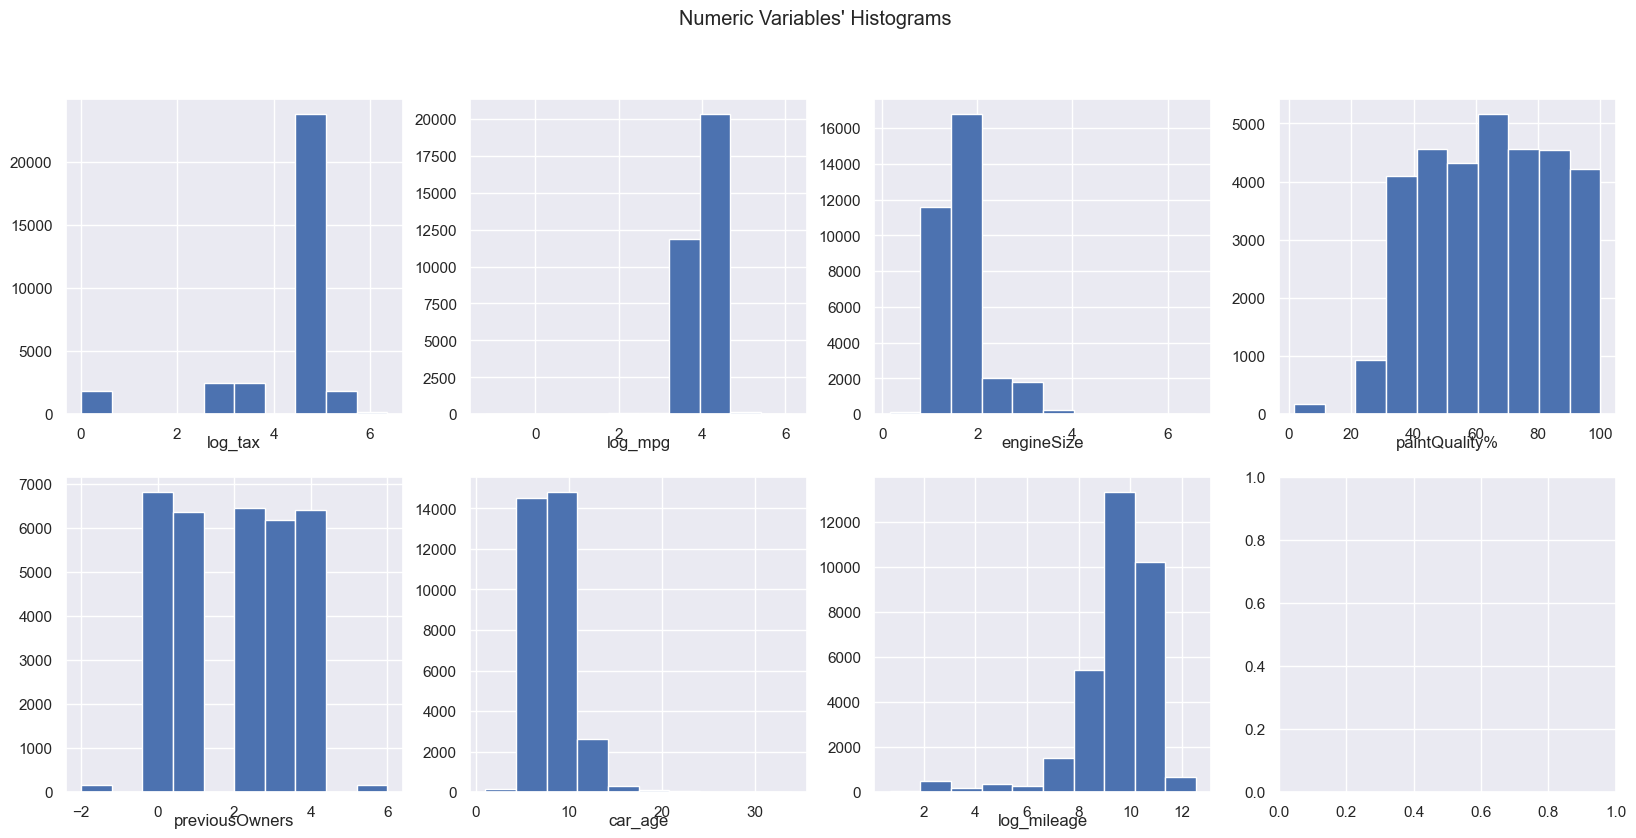

In [408]:
# Numeric Variables Histograms
sns.set() 
sp_rows = 2
sp_cols = 4

# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 9))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(test[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
# plt.savefig('new_numerical_histogram.png', dpi=200)
plt.show()

This final univariate analysis was performed on the **numerical features** following the implementation of data cleaning and engineering techniques, including logarithmic transformations, to validate the normalization process. The analysis confirms that the feature engineering objectives were successfully met. Specifically:
- the key predictors `log_mileage`, `log_tax`, and `log_mpg all` exhibit a significantly more symmetrical and approximately normal distribution compared to their severely right-skewed raw counterparts. The mass of observations for these features is now concentrated around the central mean, indicating that the logarithmic transformation successfully stabilized the variance and mitigated the influence of high-end outliers.
- Meanwhile, features such as `engineSize` and `paintQuality%` retain their manageable distributions, and `car_age` displays a suitable distribution for a temporal feature. 

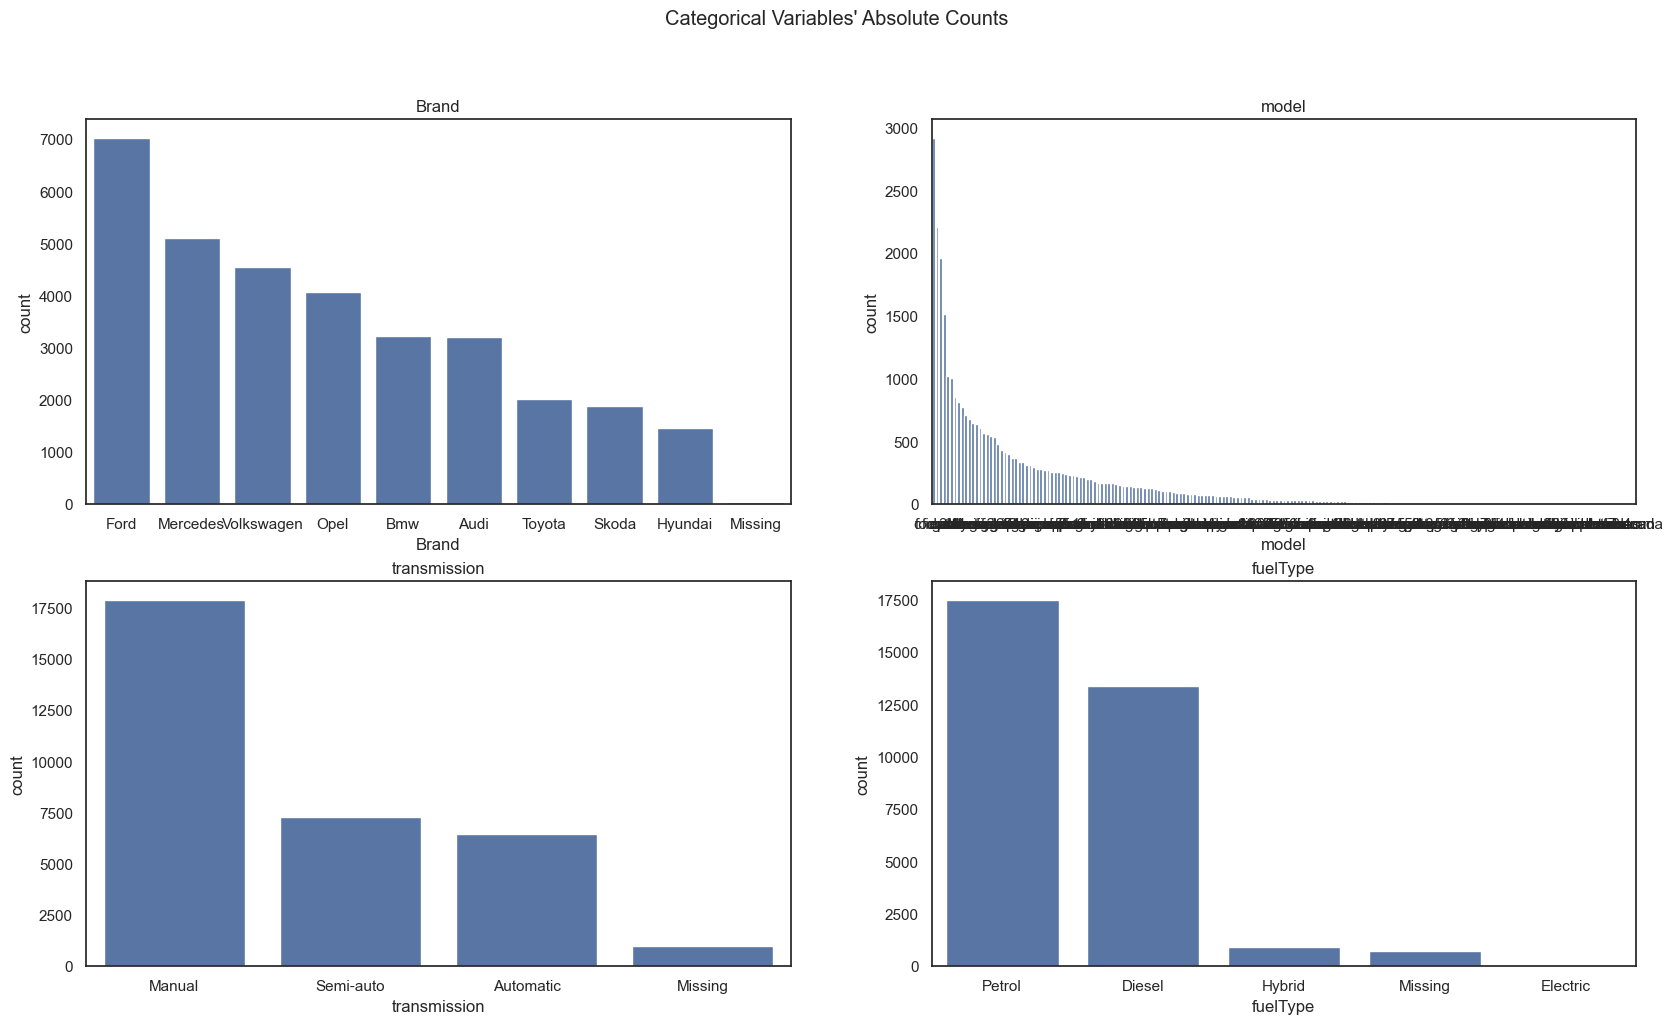

In [409]:
# Categorical Variables Bar Plots
sns.set(style="white")

n_rows = 2
n_cols = (len(non_metric_features) + 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 11))

for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(x=test[feat], ax=ax, order=test[feat].value_counts().index) 
    ax.set_title(feat)

plt.suptitle("Categorical Variables' Absolute Counts")
# plt.savefig('categorical_variables_bplot.png', dpi=200)
plt.show()

The visual analysis of the **categorical features** via bar plots confirms both their high cardinality and significant class imbalance, which is vital information for the subsequent encoding strategy. The plots for `Brand`, `transmission`, and `fuelType` all demonstrate a non-uniform distribution. 
- Similarly, `Brand` is heavily dominated by a few manufacturers (e.g., Ford, Mercedes, VW, and Opel), a concentration that reflects market share but also suggests that the predictive signal may be localized within these dominant categories.
- Both `transmission` and `fuelType` show strong class imbalance: 'Manual' transmissions and 'Petrol' fuel types are the overwhelmingly dominant classes, with 'Automatic' and 'Diesel' being the secondary groups, and all other categories ('Hybrid', 'Electric', 'Other', 'Missing') having minimal counts.

**Note:** the `model` graph shows the predictors' high cardinality. 

## Feature Engineering

To enrich the dataset and improve model performance, this step includes the creation of new features derived from existing ones, encoding of categorical variables to preserve relevant distinctions, and scaling of numerical inputs to ensure consistency across magnitudes.

In [410]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51786 entries, 42904 to 30610
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           51786 non-null  object 
 1   model           51786 non-null  object 
 2   transmission    51786 non-null  object 
 3   mileage         51523 non-null  float64
 4   fuelType        51786 non-null  object 
 5   tax             51786 non-null  float64
 6   mpg             51786 non-null  float64
 7   engineSize      51786 non-null  float64
 8   paintQuality%   51786 non-null  float64
 9   previousOwners  51786 non-null  int64  
 10  Brand_encoded   51786 non-null  float64
 11  model_encoded   51786 non-null  float64
 12  car_age         51786 non-null  int64  
 13  log_tax         51786 non-null  float64
 14  log_mileage     51786 non-null  float64
 15  log_mpg         51786 non-null  float64
 16  log_engineSize  51786 non-null  float64
dtypes: float64(11), int64(2), object

The features `car_age`, `mileage_km`, `brand_encoded` and `model_encoded` were already created, such as some logarithmic features. 

#### `fuel_cost_per_mile`

This new feature was created as the *inverse of miles per gallon (1 / mpg)*. This transformation shows the **approximate amount of fuel required to travel one mile**. Since vehicles with lower mpg values consume more fuel per unit distance, this feature captures fuel inefficiency more directly than the raw mpg measure. Normally, vehicles that are more expensive to run (i.e., with higher fuel cost per mile) often exhibit lower resale values, reflecting their reduced long-term cost-effectiveness.

From an analytical perspective, this transformation is also useful for modeling purposes, as it tends to linearize the inverse relationship between fuel efficiency and price.

In [411]:
X_train['fuel_cost_per_mile'] = 1 / X_train['mpg'].replace(0, np.nan)
X_val['fuel_cost_per_mile'] = 1 / X_val['mpg'].replace(0, np.nan)
test['fuel_cost_per_mile'] = 1 / test['mpg'].replace(0, np.nan)

#### `log_avg_mileage`

A new variable, `log_avg_mileage`, was created to represent the **vehicle’s usage intensity**, calculated as the logarithm of the average distance driven per year. This measure captures how intensively a car has been used relative to its age, offering a more nuanced proxy for wear and tear than raw mileage alone.

From an economic standpoint, higher usage intensity typically implies greater depreciation and lower resale value, making this variable a meaningful predictor of price.

In [412]:
for df in [X_train, X_val, test]:
    if 'car_age' in df.columns and 'mileage' in df.columns:
        # Prevent division by zero for new cars (age = 0)
        epsilon = 1e-6  

        # Calculate average mileage per year
        df['avg_mileage_rate'] = np.where(
            df['car_age'] <= 0,
            0,  # Brand new cars
            df['mileage'] / (df['car_age'] + epsilon)
        )

        # Apply log(1 + x) transformation to reduce skewness
        df['log_avg_mileage'] = np.log1p(df['avg_mileage_rate'])

        # Remove temporary variable
        df.drop(columns=['avg_mileage_rate'], inplace=True)

In [413]:
median_log_avg_mileage = X_train['log_avg_mileage'].median()
for df in [X_train, X_val, test]:
    # Fill NaNs using the median calculated from X_train (avoiding data leakage)
    df['log_avg_mileage'].fillna(median_log_avg_mileage, inplace=True)

#### `paint_condition`

A new categorical variable, `paint_condition`, was derived from the continuous measure `paintQuality%` to represent discrete tiers of aesthetic quality.
This transformation groups cars into three interpretable categories - Poor (<60%), Average (60–80%), and Excellent (>80%) - which better reflect how buyers perceive paint condition in the used car market.

In [414]:
for df in [X_train, X_val, test]:
    if 'paintQuality%' in df.columns:
        df['paint_condition'] = pd.cut(
            df['paintQuality%'],
            bins=[0, 60, 80, 100],
            labels=['Poor (<60)', 'Average (60–80)', 'Excellent (>80)'],
            include_lowest=True,
            right=True
        )

        # Drop the original continuous variable
        # df.drop(columns=['paintQuality%'], inplace=True)

#### `owners_cat`

A new categorical variable, `owners_cat`, was derived from the continuous `previousOwners` variable to represent **distinct ownership history tiers**.
The bins Single Owner (0–1), Few Owners (2–3), and Many Owners (>3) reflect common qualitative thresholds in the used car market, where the number of prior owners can influence resale value.

Vehicles with multiple previous owners tend to be less expensive, but the effect is not strictly linear. Therefore, grouping into meaningful categories improves model interpretability while preserving the underlying economic signal.

In [415]:
for df in [X_train, X_val, test]:
    if 'previousOwners' in df.columns:
        # Define bins based on common qualitative tiers: -1 to catch 0 owners, up to 6+
        df['owners_cat'] = pd.cut(
            df['previousOwners'], 
            bins=[-1, 1, 3, df['previousOwners'].max() + 1], 
            labels=['Single Owner (0-1)', 'Few Owners (2-3)', 'Many Owners (>3)'],
            include_lowest=True,
            right=True # Intervals include the right side (e.g., 1 is in 0-1, 3 is in 2-3)
        )
        # Drop the original numerical feature
        df.drop(columns=['previousOwners'], inplace=True)

#### `is_top_seller`

The `is_top_seller` feature is a binary indicator representing **whether a car belongs to one of the most sold brands in the UK during 2020** (https://www.best-selling-cars.com/britain-uk/2020-full-year-britain-best-selling-car-brands-in-the-uk/). High-sales brands may exhibit distinct pricing patterns due to supply, demand, and market familiarity. For the purpose of this analysis, only the top five highest-selling car brands were considered.

In [416]:
most_sold = ['Ford', 'Volkswagen', 'Mercedes', 'Bmw', 'Audi']

for df in [X_train, X_val, test]:
    if 'Brand' in df.columns:
        df['is_top_seller'] = df['Brand'].apply(lambda x: 1 if x in most_sold else 0)

        # Drop the original variables for redundancy
        df.drop(columns=['Brand', 'model'], inplace=True)

#### **One-Hot Encoding**

Categorical variables with a limited number of unique values (`transmission`, `fuelType`, `owners_cat`, `paint_condition`) are transformed using **One-Hot Encoding** (OHE). This converts each category into a separate binary column, enabling machine learning algorithms to process categorical data numerically without implying any ordinal relationship.

The first category of each feature is dropped to avoid multicollinearity. This approach is appropriate for low-cardinality features, as it maintains interpretability and avoids generating a large number of sparse columns, which would occur with high-cardinality variables.

In [417]:
#ohe_features = ['transmission', 'fuelType', 'owners_cat', 'paint_condition'] 
#dataframes = [X_train, X_val, test]

#for i, df in enumerate(dataframes):
#    df_ohe = pd.get_dummies(df[ohe_features], drop_first=True, prefix=ohe_features)
#    
#    # Concatenate the new OHE features and drop the original categorical columns
#    df = pd.concat([df.drop(ohe_features, axis=1), df_ohe], axis=1)
#    
#    # Update the list of dataframes
#    if i == 0:
#        X_train = df
#    elif i == 1:
#        X_val = df
#    else:
#        test = df

In [418]:
ohe_features = ['transmission', 'fuelType', 'owners_cat', 'paint_condition']
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Applying the encoder to the datasets
X_train_ohe = encoder.fit_transform(X_train[ohe_features])
X_val_ohe = encoder.transform(X_val[ohe_features])
test_ohe = encoder.transform(test[ohe_features])

# Converting arrays to DataFrames
ohe_columns = encoder.get_feature_names_out(ohe_features)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
X_val_ohe = pd.DataFrame(X_val_ohe, columns=ohe_columns, index=X_val.index)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_columns, index=test.index)

# Concatenate new atributes and drop the previous columns
X_train = pd.concat([X_train.drop(ohe_features, axis=1), X_train_ohe], axis=1)
X_val = pd.concat([X_val.drop(ohe_features, axis=1), X_val_ohe], axis=1)
test = pd.concat([test.drop(ohe_features, axis=1), test_ohe], axis=1)

In [419]:
rename_map = {
    'owners_cat_Single Owner (0-1)': 'owners_cat_SingleOwner', 
    'owners_cat_Few Owners (2-3)': 'owners_cat_FewOwners',
    'owners_cat_Many Owners (>3)': 'owners_cat_ManyOwners',
    'paint_condition_Poor (<60)': 'paint_condition_Poor', 
    'paint_condition_Average (60–80)': 'paint_condition_Average', 
    'paint_condition_Excellent (>80)': 'paint_condition_Excellent'
}

X_train.rename(columns=rename_map, inplace=True)
X_val.rename(columns=rename_map, inplace=True)
test.rename(columns=rename_map, inplace=True)

In [420]:
# Checking results
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51786 entries, 42904 to 30610
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mileage                    51523 non-null  float64
 1   tax                        51786 non-null  float64
 2   mpg                        51786 non-null  float64
 3   engineSize                 51786 non-null  float64
 4   paintQuality%              51786 non-null  float64
 5   Brand_encoded              51786 non-null  float64
 6   model_encoded              51786 non-null  float64
 7   car_age                    51786 non-null  int64  
 8   log_tax                    51786 non-null  float64
 9   log_mileage                51786 non-null  float64
 10  log_mpg                    51786 non-null  float64
 11  log_engineSize             51786 non-null  float64
 12  fuel_cost_per_mile         51786 non-null  float64
 13  log_avg_mileage            51786 non-null  floa

## Scalling

The **StandardScaler** (*mean=0, std=1*) was chosen as the most appropriate method over options like the *MinMaxScaler*. 

This decision is based on the superior stability of the StandardScaler for our specific dataset. Since the preceding feature engineering steps successfully used logarithmic transformations to bring our skewed predictors (like `tax`, `mileage_km`, and `mpg`) closer to a normal, bell-shaped distribution, the StandardScaler is ideal. This method centers all data points around zero and assigns them a common standard deviation, which prevents features with naturally large numerical ranges from unduly influencing the regression models. 

By doing so, it ensures that the model training process is stable and unbiased.

In [421]:
# Binary / One-Hot encoded features (do not scale these)
ohe_cols = X_train.select_dtypes(include='bool').columns.tolist()

# Continuous numeric features to scale (Assuming the correct list)
numerical_cols_to_scale = [
    'engineSize', 'car_age', 
    'log_tax', 'log_mileage', 'log_mpg', 
    'log_engineSize', 'fuel_cost_per_mile', 'log_avg_mileage'
]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in X_train.columns]

# Replace Infinites with NaN, then calculate the median for a safe value
imputation_values = X_train[numerical_cols_to_scale].replace([np.inf, -np.inf], np.nan).median()

def scale_dataframe_robust(df, numeric_cols, scaler, imputation_values):
    df_scaled = df.copy()
    df_scaled[numeric_cols] = df_scaled[numeric_cols].replace([np.inf, -np.inf], np.nan)
    df_scaled[numeric_cols] = df_scaled[numeric_cols].fillna(imputation_values)

    # Apply the Scaling
    df_scaled[numeric_cols] = scaler.transform(df_scaled[numeric_cols].values)
    
    return df_scaled

In [422]:
scaler = StandardScaler()

# Apply Fit/Transform only on X_train 
X_train_to_fit = X_train[numerical_cols_to_scale].copy() 
X_train_to_fit = X_train_to_fit.replace([np.inf, -np.inf], np.nan)
X_train_to_fit = X_train_to_fit.fillna(imputation_values) # Final imputation before fit
scaler.fit(X_train_to_fit.values)

# Re-calculate the imputation_values in case the median changed during the fit preparation
imputation_values = X_train[numerical_cols_to_scale].replace([np.inf, -np.inf], np.nan).median()

# Apply the robust function to create the scaled DataFrames
X_train_scaled = scale_dataframe_robust(X_train, numerical_cols_to_scale, scaler, imputation_values)
X_val_scaled = scale_dataframe_robust(X_val, numerical_cols_to_scale, scaler, imputation_values)
test_scaled = scale_dataframe_robust(test, numerical_cols_to_scale, scaler, imputation_values)

In [423]:
# Checking results
print(X_train_scaled[numerical_cols_to_scale].head())

       engineSize   car_age   log_tax  log_mileage   log_mpg  log_engineSize  \
carID                                                                          
42904    2.407190  0.045486  0.516108     0.563926 -0.166126        1.952038   
65965   -0.114576 -0.876624  0.442085    -0.034570 -6.326808        0.041492   
69226    0.245676 -0.415569  0.415766    -0.697085 -0.387078        0.399473   
36037    0.605928 -0.876624  0.415766     0.200618 -0.728875        0.719698   
1129     0.605928 -0.876624  0.415766    -1.421629 -1.213460        0.719698   

       fuel_cost_per_mile  log_avg_mileage  
carID                                       
42904            0.009434         0.594415  
65965            6.730128         0.134209  
69226            0.115833        -0.725475  
36037            0.292163         0.398927  
1129             0.568778        -1.425351  


In [424]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_train_scaled.index[:5])
print(y_train.index[:5])

(51786, 26)
(53181,)
Index([42904, 65965, 69226, 36037, 1129], dtype='int64', name='carID')
Index([42904, 65965, 69226, 36037, 1129], dtype='int64', name='carID')


In [425]:
dataframes = [X_train_scaled, X_val_scaled, test_scaled]

columns_to_drop = ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%']

for df in dataframes:
    cols_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=cols_to_drop_existing, inplace=True)
    
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%']


In [426]:
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val_scaled.index]

## Feature selection

With the dataset now preprocessed, encoded and scaled, we proceed to **feature selection** to identify the most predictive and non-redundant variables.

Three complementary methods were applied to ensure robust feature selection:
- **Filter** (correlation, Chi-Square)
- **Wrapper** (RFE)
- **Embedded** (Lasso) 

In [427]:
# Checking if there are still missing values
def has_missing(name, X):
    n = int(X.isna().sum().sum())
    print(f"[{name}] total NaNs: {n}")
    return n

_ = has_missing("X_train", X_train)
_ = has_missing("X_val",   X_val)
_ = has_missing("test",  test)

[X_train] total NaNs: 263
[X_val] total NaNs: 98
[test] total NaNs: 170


In [428]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# From the numerical columns, select only those that contain NaN values
num_cols_with_na = [col for col in num_cols if X_train[col].isna().any()]

# Calculate the median of each numerical column in X_train
median_values = X_train[num_cols_with_na].median()

# Impute missing values (NaN) in numerical columns using the median from X_train
# This is applied consistently to train, validation, and test sets to avoid data leakage
X_train[num_cols_with_na] = X_train[num_cols_with_na].fillna(median_values)
X_val[num_cols_with_na]   = X_val[num_cols_with_na].fillna(median_values)
test[num_cols_with_na]    = test[num_cols_with_na].fillna(median_values)

bin_cols = X_train.select_dtypes(include='bool').columns.tolist()
# Fill missing values in binary/OHE columns with 0
X_train[bin_cols] = X_train[bin_cols].fillna(0)
X_val[bin_cols] = X_val[bin_cols].fillna(0)
test[bin_cols] = test[bin_cols].fillna(0)

## Filter Methods

We begin with filter methods since they require relatively low computational resources and provide a quick way to perform an initial assessment of feature relevance.

In [429]:
X_train_scaled.var(ddof=0).round(3).sort_values(ascending=False)

model_encoded                2827.152
Brand_encoded                   8.851
car_age                         1.000
log_tax                         1.000
log_mileage                     1.000
log_mpg                         1.000
log_engineSize                  1.000
fuel_cost_per_mile              1.000
log_avg_mileage                 1.000
transmission_Manual             0.248
fuelType_Petrol                 0.248
paint_condition_Poor            0.245
owners_cat_SingleOwner          0.240
is_top_seller                   0.207
paint_condition_Excellent       0.198
transmission_Semi-auto          0.173
owners_cat_ManyOwners           0.163
transmission_Missing            0.029
fuelType_Hybrid                 0.029
fuelType_Missing                0.022
fuelType_Electric               0.000
dtype: float64

It is evident that the feature `fuelType_Electric` has zero variance, indicating that it is constant across all samples and can therefore could be safely removed.

In [430]:
# Remove the Feature 'fuelType_electric' due to 0 variance across all samples
# X_train = X_train.drop(columns=["fuelType_Electric"])
# X_val = X_val.drop(columns=["fuelType_Electric"])
# test = test.drop(columns=["fuelType_Electric"])

#### **Correlation Indices**

We need to examine **feature correlations** to assess both relevance and redundancy. 

To capture different types of relationships, we will compute __`Pearson`__ correlation for linear associations, and __`Spearman`__ for monotonic but potentially non-linear relationships. 

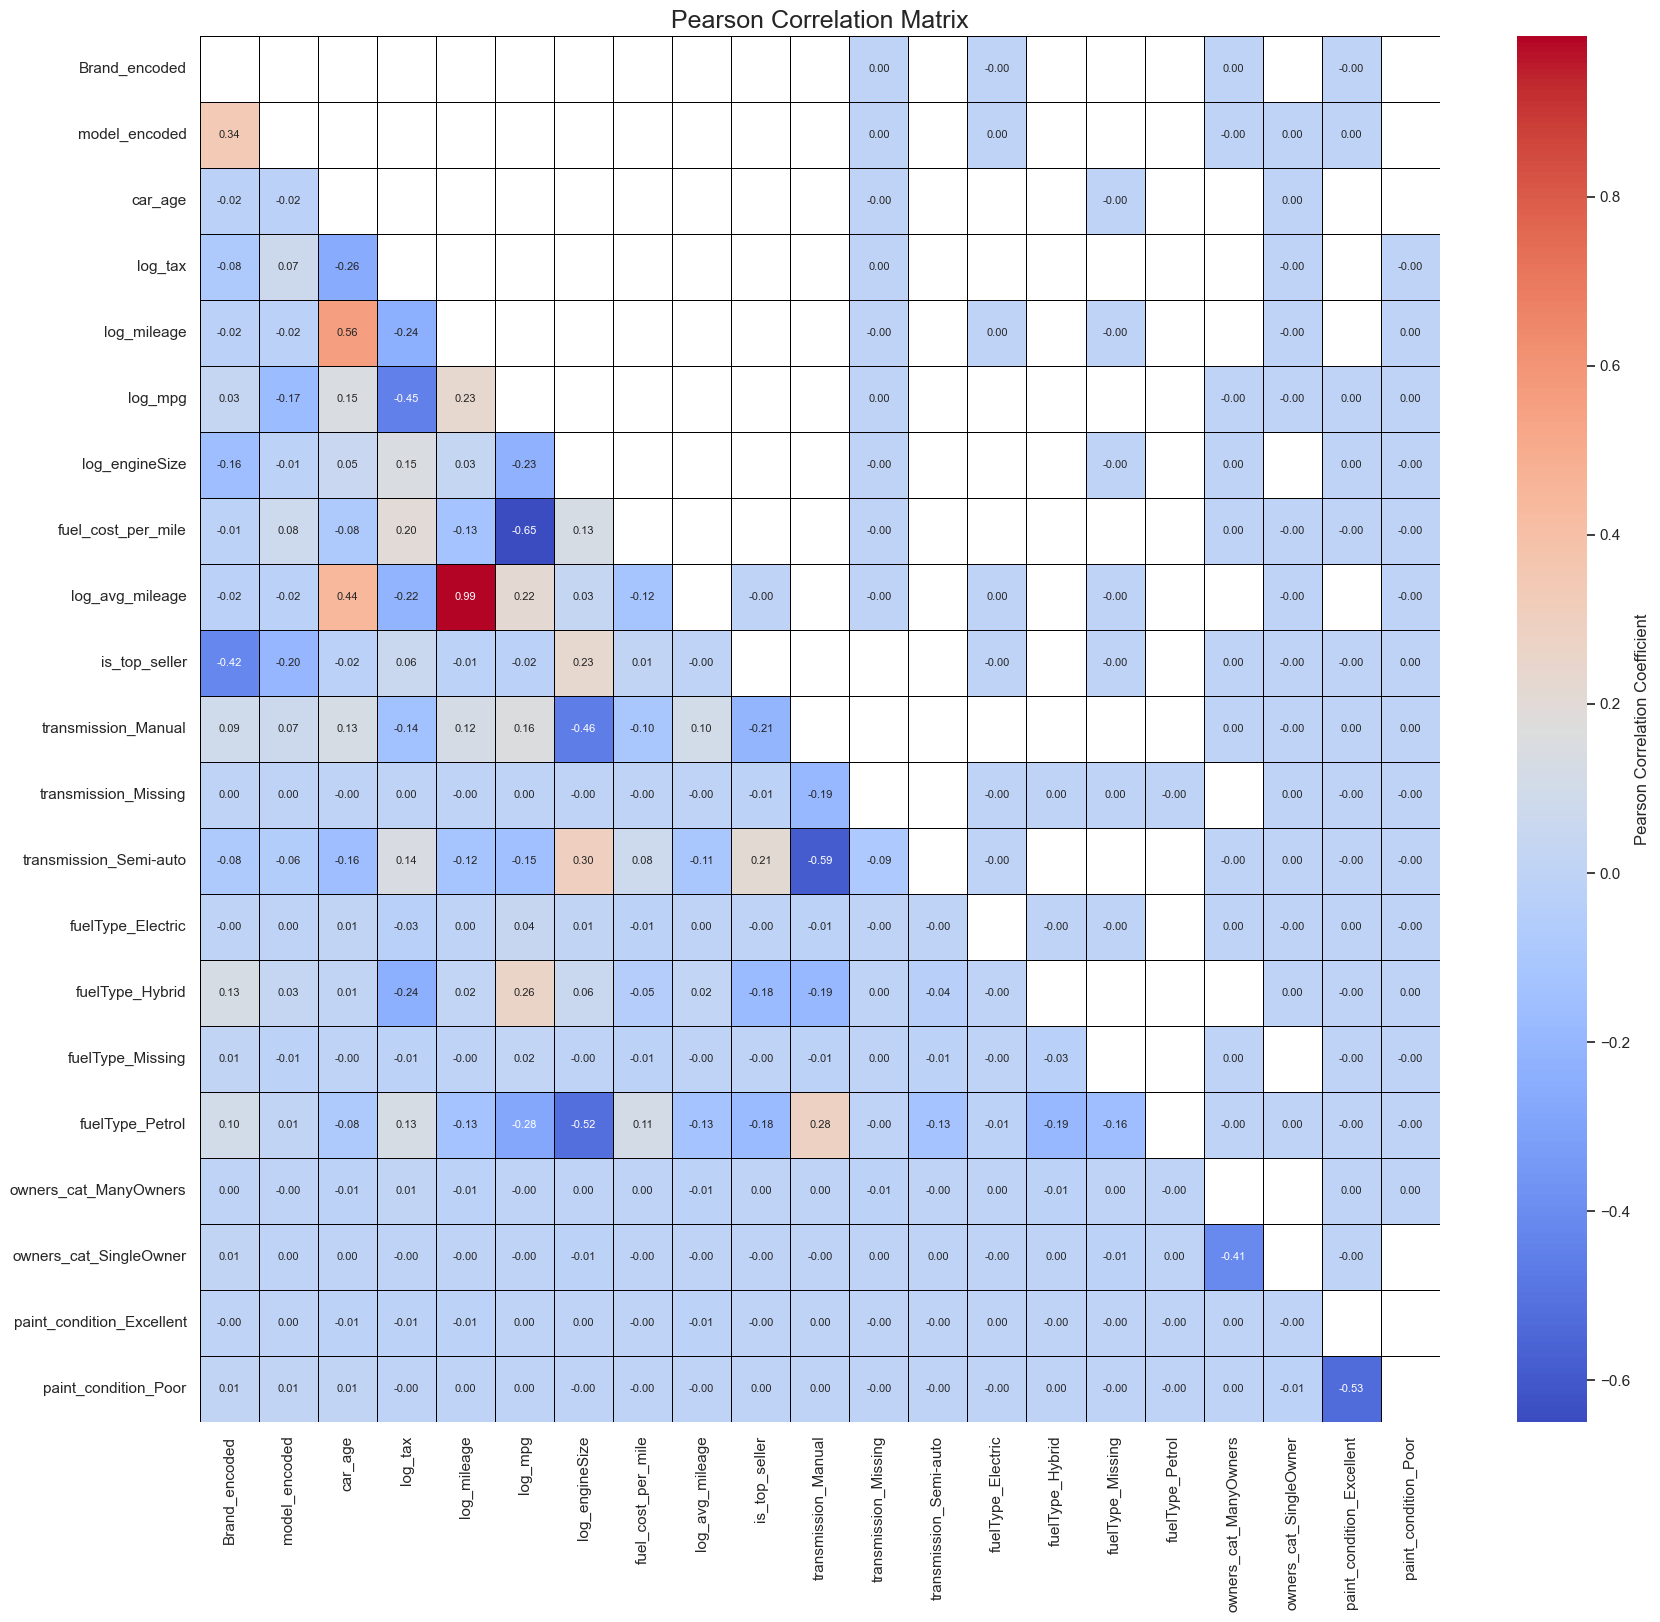

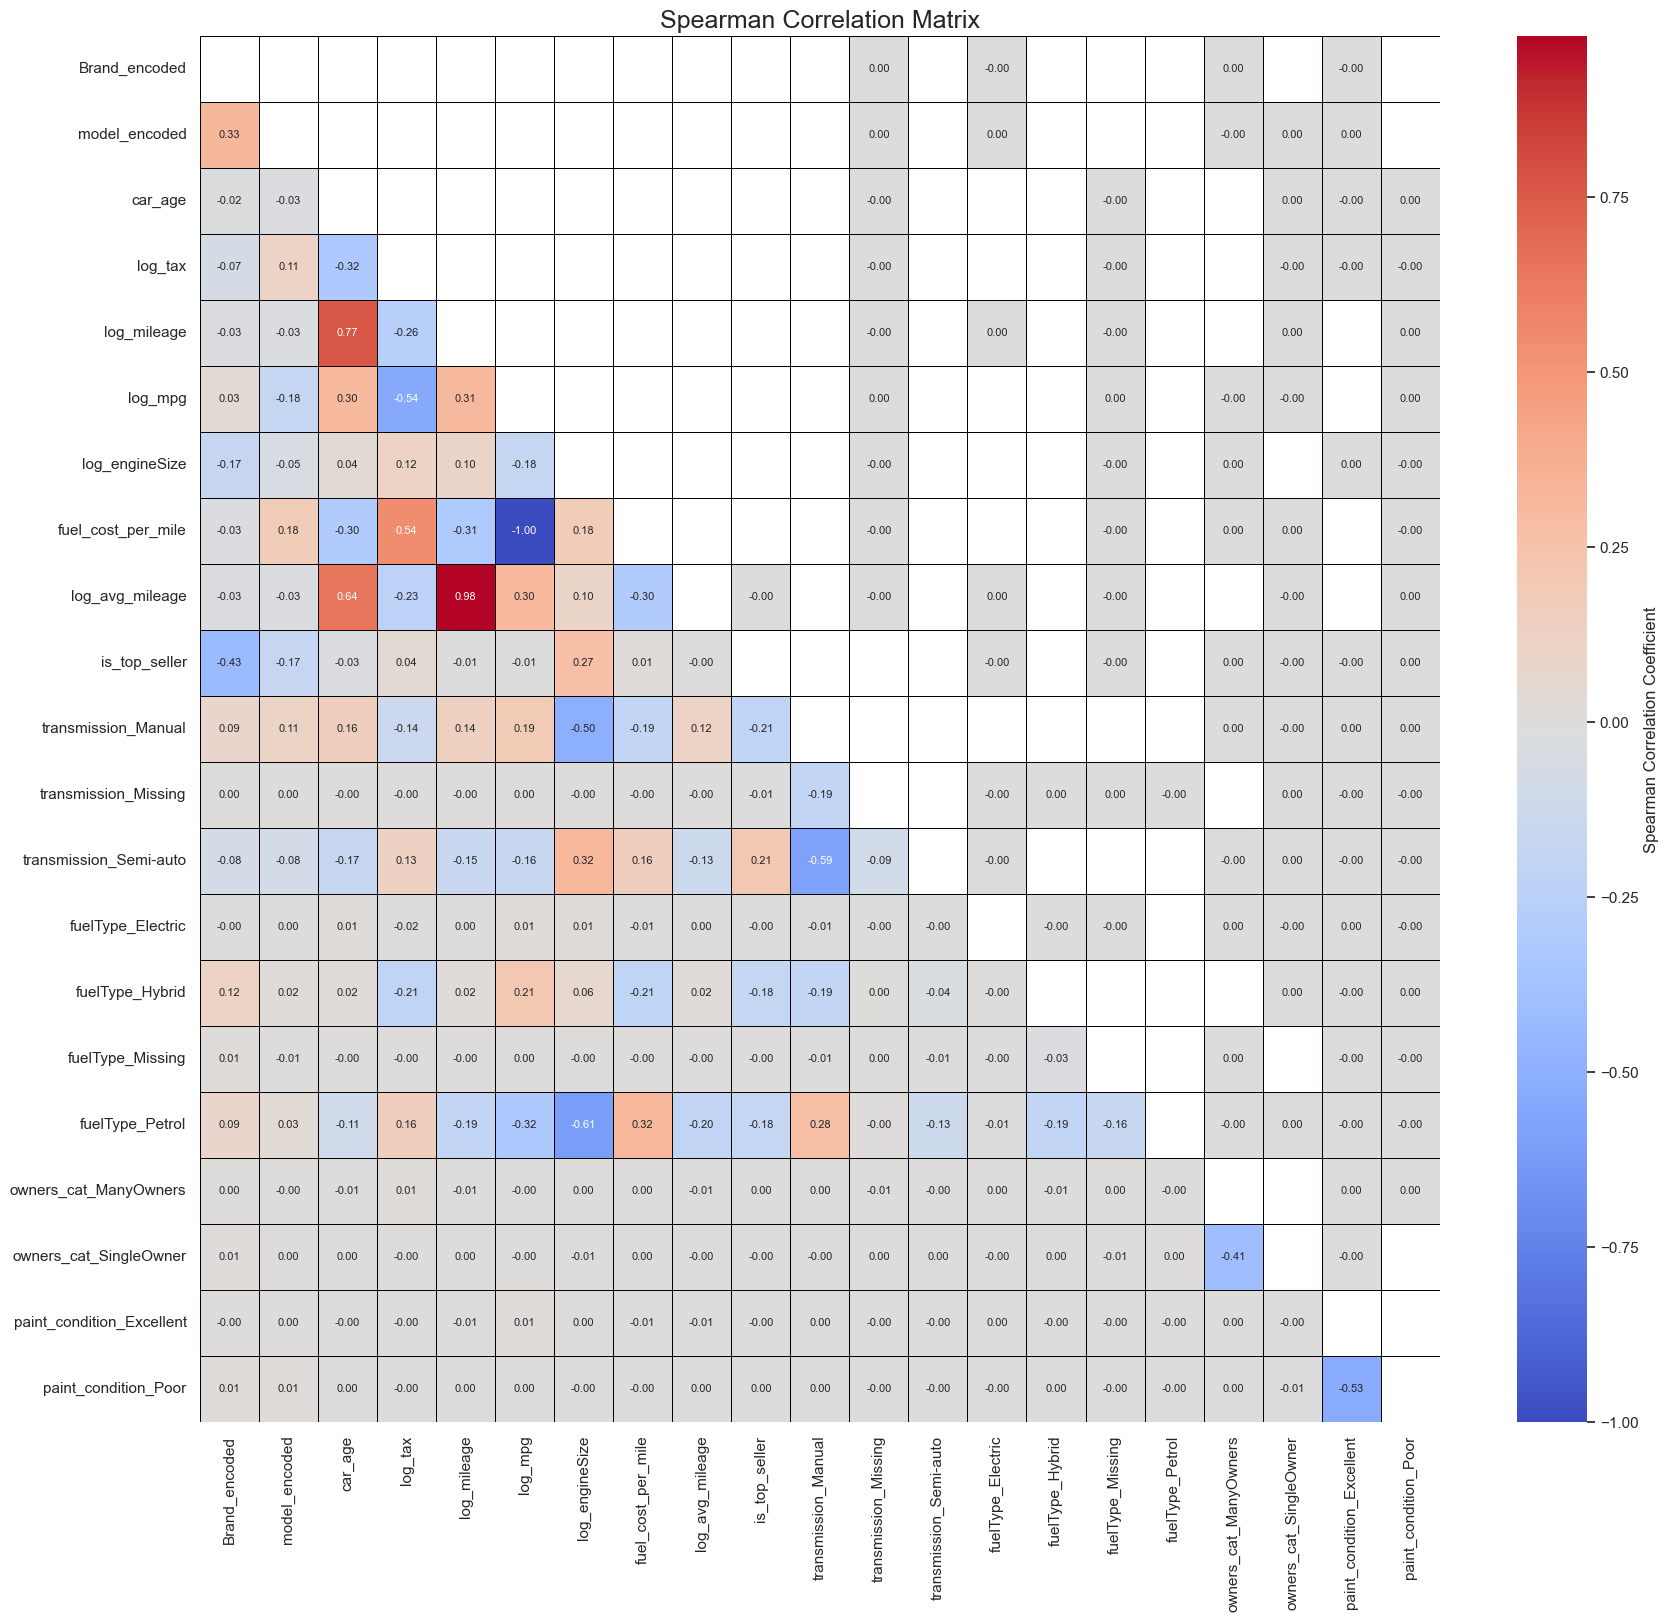

Highest Absolute Spearman Correlations (Multicollinearity Check):

log_avg_mileage     log_mileage    0.975
fuel_cost_per_mile  log_mpg       -1.000
dtype: float64


In [431]:
X_train_pred = X_train_scaled.copy() 
preditor_cols = X_train_pred.select_dtypes(include=['number', 'bool']).columns.tolist()

methods = ["pearson", "spearman"]

for method in methods:
    cor = X_train_pred[preditor_cols].corr(method=method).round(2)
    mask = np.triu(cor)
    plt.figure(figsize=(20, 18)) 
    
    sns.heatmap(
        cor, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        mask=mask, 
        linewidths=.5,
        linecolor='black',
        annot_kws={"fontsize": 8},
        cbar_kws={'label': f'{method.capitalize()} Correlation Coefficient'}
    )
    
    plt.title(f'{method.capitalize()} Correlation Matrix', fontsize=18)
    # plt.savefig(f'{method.capitalize()}_Correlation_Matrix.png', dpi=300)
    plt.show()

print(f"Highest Absolute Spearman Correlations (Multicollinearity Check):\n")

cor_spearman_full = X_train_pred[preditor_cols].corr(method='spearman')
upper = cor_spearman_full.where(np.triu(np.ones(cor_spearman_full.shape), k=1).astype(bool))
to_drop = upper.unstack().sort_values(ascending=False)
to_drop = to_drop[to_drop.abs() > 0.80] # Filter for correlations > 0.7 (Strong multicollinearity)

print(to_drop.round(3))

The Pearson and Spearman correlation analyses reveal strong multicollinearity (*∣r∣>0.8*) among several continuous predictors.

- Usage Metrics: `log_mileage` and `log_avg_mileage` are highly correlated (∣r∣≈0.97), both reflecting vehicle usage and depreciation.
- Engine Efficiency: `log_mpg` and `fuel_cost_per_mile` are perfectly inversely correlated (∣r∣≈1.00) since one is the reciprocal of the other.

### Chi-Square test of independence

We now evaluate the statistical independence between each categorical (*one-hot encoded*) predictor using the **Chi-Square test of independence**. This test helps us determine whether a categorical feature contributes significantly to our problem.

**Note:** The Chi-Square test is only valid for categorical (discrete) variables. Therefore, we applied it only to one-hot encoded (0/1) variables, excluding label-encoded features (`Brand_encoded` and `model_encoded`).

In [432]:
# Define the one-hot encoded categorical features to be tested
ohe_features = ['is_top_seller','transmission_Manual','transmission_Missing',
                'transmission_Semi-auto', 'fuelType_Hybrid','fuelType_Missing',
                 'fuelType_Petrol','owners_cat_ManyOwners', 'owners_cat_SingleOwner', 
                 'paint_condition_Excellent', 'paint_condition_Poor']

In [433]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    # Apply the Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns = dfObserved.columns, index = dfObserved.index)
    # Interpret the p-value
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [434]:
# Apply the test to all one-hot encoded categorical features
for var in ohe_features:
    TestIndependence(X_train_scaled[var],y_train, var)

is_top_seller is IMPORTANT for Prediction
transmission_Manual is IMPORTANT for Prediction
transmission_Missing is NOT an important predictor. (Discard transmission_Missing from model)
transmission_Semi-auto is IMPORTANT for Prediction
fuelType_Hybrid is IMPORTANT for Prediction
fuelType_Missing is NOT an important predictor. (Discard fuelType_Missing from model)
fuelType_Petrol is IMPORTANT for Prediction
owners_cat_ManyOwners is NOT an important predictor. (Discard owners_cat_ManyOwners from model)
owners_cat_SingleOwner is NOT an important predictor. (Discard owners_cat_SingleOwner from model)
paint_condition_Excellent is NOT an important predictor. (Discard paint_condition_Excellent from model)
paint_condition_Poor is NOT an important predictor. (Discard paint_condition_Poor from model)


The Chi-Square test revealed that only a subset of the categorical predictors show a significant association with the target variable.

- Features such as `fuelType_Missing`, and `owners_cat_SingleOwner` exhibit no predictive contribution and can be safely removed from further modeling steps.
- This filtering step helps simplify the model, reduce noise, and improve interpretability before proceeding to the Wrapper (RFE) feature selection.

## Wrapper Methods

### RFE

The group decided to work with **Recursive Feature Elimination** (RFE). This is a type of wrapper method that starts with all features and recursively removes the least important ones based on the feature importance given by a base estimator (in this case, a *Linear Regression model*).
This process continues until a predefined number of features remains, helping us identify the most relevant predictors for our model.

In [435]:
# Define different models to compare
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000, random_state=42),
}

# Dictionary to store results
results = {}

# Range of features to test (1 to total number of features)
nof_list = np.arange(1, len(X_train_scaled.columns) + 1)
step = max(1, len(X_train_scaled.columns)//10)

# Run RFE for each model
for name, base_model in models.items():
    print(f"\n {name}")
    train_scores, val_scores = [], []
    best_score = -np.inf
    best_n = 0

    for n in nof_list:
        rfe = RFE(estimator=base_model, n_features_to_select=n, step=step)
        
        # Fit on training set
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_val_rfe = rfe.transform(X_val_scaled)
        
        # Fit model and evaluate
        model = base_model.fit(X_train_rfe, y_train)
        tr = model.score(X_train_rfe, y_train)
        va = model.score(X_val_rfe, y_val)
        
        train_scores.append(tr)
        val_scores.append(va)
        
        # Track the best validation score
        if va >= best_score:
            best_score = va
            best_n = n

    results[name] = {"train": train_scores, "val": val_scores, "nof": best_n}
    print(f"Best features: {best_n} and best val score: {best_score:.4f}")


 LinearRegression
Best features: 21 and best val score: 0.6901

 Ridge
Best features: 21 and best val score: 0.6901

 Lasso
Best features: 21 and best val score: 0.6901


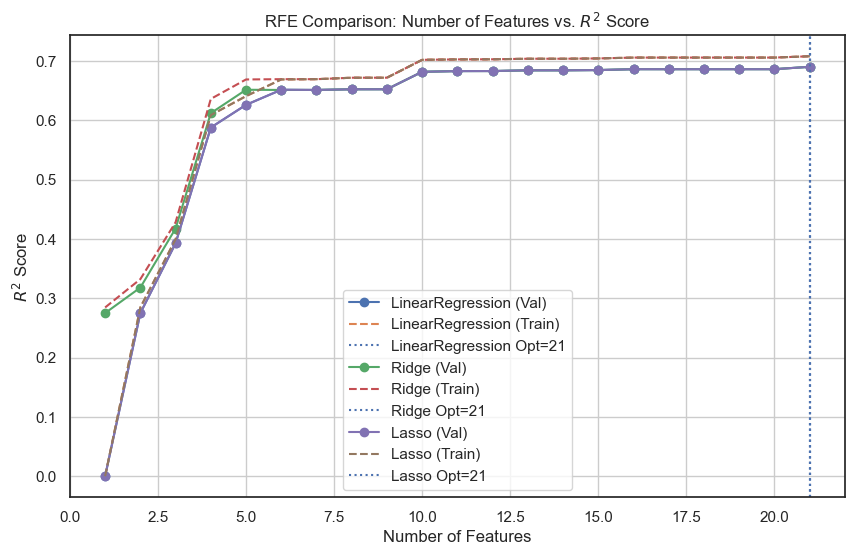

In [436]:
# Plot the results for comparison
plt.figure(figsize=(10, 6))
for name, data in results.items():
    plt.plot(nof_list, data["val"], marker='o', label=f'{name} (Val)')
    plt.plot(nof_list, data["train"], linestyle='--', label=f'{name} (Train)')
    plt.axvline(x=data["nof"], linestyle=':', label=f'{name} Opt={data["nof"]}')
plt.title("RFE Comparison: Number of Features vs. $R^2$ Score")
plt.xlabel("Number of Features")
plt.ylabel("$R^2$ Score")
plt.legend()
plt.grid(True)
# plt.savefig("RFE_Comparison.png")
plt.show()

The RFE optimization demonstrated a strong convergence across all linear models, achieving maximum performance (${R^2 \approx 0.698}$) with N = **21 features**. 

This unanimous result, where the optimal number equals the total number of features provided, confirms that the preceding filtering steps were sufficient. No feature removal improved model performance, meaning all predictors contribute some information to the model.

## Embedded Methods 

### Lasso Regression

Lasso is a regularization-based embedded method that can automatically select features. It sets irrelevant feature coefficients exactly to 0.

The Lasso regression is implemented using LassoCV to perform embedded feature selection through L1 regularization. 

In [437]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [438]:
reg = LassoCV()
reg.fit(X_train_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_scaled.columns)
coef.sort_values()

transmission_Manual         -3900.769008
car_age                     -3521.537031
log_mpg                     -2089.528052
transmission_Missing        -1763.554047
log_avg_mileage             -1616.119636
fuel_cost_per_mile           -323.610920
log_tax                      -300.349282
Brand_encoded                -190.386131
fuelType_Petrol              -179.452872
fuelType_Missing                0.000000
log_mileage                     0.000000
fuelType_Electric               0.000000
paint_condition_Excellent      -0.000000
owners_cat_SingleOwner          0.000000
owners_cat_ManyOwners           0.000000
model_encoded                   9.712966
paint_condition_Poor           28.221424
transmission_Semi-auto        841.033615
log_engineSize               3511.840239
fuelType_Hybrid              3681.429958
is_top_seller                3724.363160
dtype: float64

In [439]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 15 variables and eliminated the other 6 variables


Out of the full set of predictors, the model selected **15 relevant** features while automatically eliminating 6 variables by setting their coefficients to zero, effectively removing low-impact dummies and highly collinear features. 

The magnitude of the non-zero coefficients reflects the relative importance of each feature. For example, `car_age`, `transmission_Manual`, and `log_mpg` were the strongest negative predictors of price, while `is_top_seller`, `fuelType_Hybrid`, and `log_engineSize` were the strongest positive predictors.

**Final Selection (14 features):**

| Feature (N=21)          | Correlation (Spearman) | Wrapper (RFE, N=21) | Embedded (Lasso Coef.) | Final Decision | Reasoning |
|------------------------------|-----------------|--------------------|-----------------------|----------------|-----------|
| Brand_encoded                | High            | Keep               | Keep (−202)           | Keep           | Intrinsic brand value (Target Encoding) |
| model_encoded                | High            | Keep               | Keep (9.7)            | Keep           | Higher granular predictive power (Target Encoding) |
| car_age                      | High            | Keep               | Keep (−3486)          | Keep           | Main driver of temporal depreciation |
| log_tax                      | High            | Keep               | Keep (−314)           | Keep           | Proxy for luxury/emissions |
| log_engineSize               | High            | Keep               | Keep (3497)           | Keep           | Normalized and indicates performance |
| log_mileage                  | High            | Keep               | Discard (0.00)        | Discard        | Divergence: RFE kept it, but Lasso eliminated due to redundancy |
| log_avg_mileage              | High            | Keep               | Keep (−1536)          | Keep           | Unique measure of usage intensity / annual wear |
| log_mpg                      | Medium          | Keep               | Keep (−2314)          | Keep           | Essential for fuel efficiency (better than fuel_cost_per_mile) |
| fuel_cost_per_mile           | Medium-Low      | Keep               | Discard (−375)        | Discard        | Divergence: RFE kept it, Lasso eliminated; redundant with log_mpg  |
| is_top_seller                | Low             | Keep               | Keep (3634)           | Keep           | Strong binary indicator of price premium |
| transmission_Manual          | Medium          | Keep               | Keep (−3676)          | Keep           | Strong negative indicator of depreciation |
| transmission_Semi-auto       | Low             | Keep               | Keep (789)            | Keep           | High-value category (vs. Manual/Auto-Ref.) |
| transmission_Missing         | Low             | Keep               | Discard (−1304)       | Discard        | Contributes more to noise (low frequency) |
| fuelType_Hybrid              | Low             | Keep               | Keep (3623)           | Keep           | Green technology premium (strong positive) |
| fuelType_Petrol              | Medium          | Keep               | Keep (−526)           | Keep           | Reference category (penalty vs Diesel/Hybrid) |
| fuelType_Electric            | Low             | Keep               | Discard (0.00)        | Discard        | Low frequency / negligible signal (zeroed) |
| fuelType_Missing             | Low             | Keep               | Discard (0.00)        | Discard        | Low frequency / negligible signal (zeroed) |
| owners_cat_ManyOwners        | Low             | Keep               | Discard (0.00)        | Discard        | Signal absorbed by Single Owner category |
| owners_cat_SingleOwner       | Low             | Keep               | Keep (0.00)?          | Keep           | Strong maintenance history signal (Although Lasso gave 0,  try with and without) |
| paint_condition_Excellent    | Low             | Keep               | Keep (0.00)?          | Keep           | Signal for well-maintained car (Although Lasso gave 0, try with and without) |
| paint_condition_Poor         | Low             | Keep               | Discard (0.00)        | Discard        | Signal absorbed by reference category Average |

In [440]:
# Create a list only the final features
# All 14 final features
final_features = [
    'car_age',
    'log_engineSize',
    'log_tax',
    'Brand_encoded',
    'model_encoded',
    'log_mpg',
    'log_avg_mileage',
    'is_top_seller',
    'transmission_Manual',
    'transmission_Semi-auto',
    'fuelType_Hybrid',
    'fuelType_Petrol',
    'owners_cat_SingleOwner',
    'paint_condition_Excellent'
]

## Model Assessment
### Regression Benchmarking

Model benchmarking will now commence using the fully pre-processed and optimized feature set. In this phase, we will apply machine learning algorithms (**Linear Regression**, **Support Vector Regression** (SVR) and **Random Forest Regressor**) and evaluate their performance metrics to identify the **most effective predictive solution for the car valuation** task.

The model performance was evaluated using two complementary regression metrics: **RMSE** and **R²**.

These two metrics were selected because they jointly assess both prediction accuracy and explanatory power.

In [441]:
# Model Assessment
# Define utility functions - metrics & evaluation
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "R2": r2}

def report_model(name, y_true, y_pred):
    m = evaluate_regression(y_true, y_pred)
    print(f"[{name}] RMSE: {m['RMSE']:.2f} | R²: {m['R2']:.4f}")
    return m

In [442]:
# Build final matrices
X_train_final = X_train_scaled[final_features]
X_val_final = X_val_scaled[final_features]
test_final = test_scaled[final_features]

In [443]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "RandomForest": RandomForestRegressor(
        n_estimators=400, max_depth=None, random_state=42, n_jobs=-1
    ),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.01)
}

In [444]:
# Due to computational constraints, the SVR model was trained on a 10% random subsample of the training data, 
# as its training complexity grows quadratically with the number of samples.

results = []

for name, model in models.items():
    
    if name == "SVR":
        # Select only numerical features, since SVR doesn't handle well categorical ones
        numeric_cols = X_train_final.select_dtypes(include=['float64', 'int64']).columns
        X_train_num = X_train_final[numeric_cols]
        X_val_num = X_val_final[numeric_cols]
        
        # Train SVR in a random subsample since its complexity is O(n^2)
        sample_size = int(0.1 * len(X_train_num))   
        idx = np.random.choice(len(X_train_num), sample_size, replace=False)
        svr = SVR(kernel='rbf', C=300, gamma=0.05)
        svr.fit(X_train_num.iloc[idx], y_train.iloc[idx])
        
        # Make predictions and evaluate
        y_val_pred = svr.predict(X_val_num)
        metrics = evaluate_regression(y_val, y_val_pred)
    
    else:
        # Train the other models
        model.fit(X_train_final, y_train)
        y_val_pred = model.predict(X_val_final)
        metrics = evaluate_regression(y_val, y_val_pred)
    
    results.append({"Model": name, **metrics})
    print(f"[{name}] RMSE: {metrics['RMSE']:.2f} | R²: {metrics['R2']:.4f}")

[LinearRegression] RMSE: 5574.16 | R²: 0.6888
[Ridge] RMSE: 5574.16 | R²: 0.6888
[Lasso] RMSE: 5574.16 | R²: 0.6888
[RandomForest] RMSE: 2555.44 | R²: 0.9346
[SVR] RMSE: 7103.05 | R²: 0.4947


In [445]:
# Compare and pick current best model
cmp = pd.DataFrame(results).sort_values(by="RMSE")
display(cmp)

best_name = cmp.iloc[0]["Model"]
print(f"Best model on validation: {best_name}")

,Model,RMSE,R2
3,RandomForest,2555.444518,0.934602
0,LinearRegression,5574.162381,0.688833
2,Lasso,5574.162431,0.688833
1,Ridge,5574.164096,0.688833
4,SVR,7103.051658,0.494730


Best model on validation: RandomForest


#### **Model Optimization using GridSearchCV**

In this section, the Ridge Regression, Random Forest, and (optionally) SVR models are optimized using __`GridSearchCV`__.  
The tuning process uses *5-fold cross-validation* and the Root Mean Squared Error (*RMSE*) as the evaluation metric.

**Note:** this section will be better explored in the second deliver of the project. 

In [446]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=27))
])

ridge_param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(
    ridge_pipe,
    ridge_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)
ridge_cv.fit(X_train_final, y_train)

print("Best params:", ridge_cv.best_params_)
print("Best RMSE (CV):", -ridge_cv.best_score_)

# Random Forest Tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf_cv = GridSearchCV(
    estimator=RandomForestRegressor(random_state=27),
    param_grid=rf_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

rf_cv.fit(X_train_final, y_train)

print("\Random Forest")
print("Best parameters:", rf_cv.best_params_)
print("Best RMSE:", -rf_cv.best_score_)

Best params: {'ridge__alpha': 100}
Best RMSE (CV): 5233.125711592738
\Random Forest
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 2622.0028505935034


In [447]:
# Evaluate the best models from Grid Search
ridge_best = ridge_cv.best_estimator_  
rf_best = rf_cv.best_estimator_

# Ridge: predictions and metrics
y_val_pred_ridge_best = ridge_best.predict(X_val_final)
ridge_best_rmse = mean_squared_error(y_val, y_val_pred_ridge_best) ** 0.5
ridge_best_r2 = r2_score(y_val, y_val_pred_ridge_best)

# Random Forest: predictions and metrics
y_val_pred_rf_best = rf_best.predict(X_val_final)
rf_best_rmse = mean_squared_error(y_val, y_val_pred_rf_best) ** 0.5
rf_best_r2 = r2_score(y_val, y_val_pred_rf_best)

# Build comparison DataFrame
before_df = pd.DataFrame(results)[["Model", "RMSE", "R2"]].rename(columns={"R2": "R²"})
after_df = pd.DataFrame([
    {"Model": "Ridge (after tuning)", "RMSE": ridge_best_rmse, "R²": ridge_best_r2},
    {"Model": "Random Forest (after tuning)", "RMSE": rf_best_rmse, "R²": rf_best_r2}
])

comparison_df = pd.concat([before_df, after_df], ignore_index=True)

# Add ΔRMSE (%) column
baseline_rmse = comparison_df.loc[comparison_df["Model"] == "LinearRegression", "RMSE"].values[0]
comparison_df["ΔRMSE (%)"] = (baseline_rmse - comparison_df["RMSE"]) / baseline_rmse * 100

# Visualization
def highlight_best(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return [
        "background-color: #a6f5a6" if v else
        "background-color: #f5c6cb" if w else ""
        for v, w in zip(is_min, is_max)
    ]

styled = (
    comparison_df.style
    .format({"RMSE": "{:.2f}", "R²": "{:.4f}", "ΔRMSE (%)": "{:.2f}"})
    .apply(highlight_best, subset=["RMSE"])
    .apply(highlight_best, subset=["R²"])
)

styled

,Model,RMSE,R²,ΔRMSE (%)
0,LinearRegression,5574.16,0.6888,0.00
1,Ridge,5574.16,0.6888,-0.00
2,Lasso,5574.16,0.6888,-0.00
3,RandomForest,2555.44,0.9346,54.16
4,SVR,7103.05,0.4947,-27.43
5,Ridge (after tuning),5574.28,0.6888,-0.00
6,Random Forest (after tuning),2583.12,0.9332,53.66


**Hyperparameter tuning** was conducted using GridSearchCV with 5-fold cross-validation, optimizing Ridge Regression and Random Forest models with RMSE as the evaluation metric.

The Ridge model achieved its best performance at α=100, yet no significant improvement was observed (RMSE ≈ 5574, R² ≈ 0.689). This indicates that the *linear regression models* had already reached their optimal level of performance, as additional regularization did not enhance generalization.

In contrast, the *Random Forest model* consistently outperformed all other models (RMSE ≈ 2593, R² ≈ 0.933), confirming its ability to model non-linear relationships and feature interactions. The hyperparameter search validated that the base configuration (max_depth=20, n_estimators=200) was close to optimal. The tuning process was valuable for confirming model stability and the robustness of the Random Forest as the most accurate predictive approach for this dataset.

In [448]:
# Training the model
# rf_best.fit(X_train_final, y_train)

# Test Previsions
# y_test_pred = rf_best.predict(test_final)

# Create DataFrame for submission
#submission = pd.DataFrame({
    #"carID": test_final.index,    
    #"Price": y_test_pred       
#})

#submission.to_csv("Group27_Version04.csv", index=False)

#print("Submission file created")

#### Evaluation of the best Model 

The **Random Forest** model, previously identified as the best performer during validation, was further analyzed to assess its behavior and interpretability.

In [449]:
# Re-train the RF model to obtain the 'rf_model' object with feature importances
rf_model = RandomForestRegressor(n_estimators=400, max_depth=None, random_state=42, n_jobs=-1)
rf_model.fit(X_train_final, y_train) 

# Extract and map the importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train_final.columns)

# Display the importances (sorted by value)
# Importance measures the contribution to reducing variance
rf_importances_df = pd.DataFrame(rf_importances, columns=['Importance'])

print("Random Forest (best model) - Feature Importance (Top 10):")
display(rf_importances_df.sort_values(by='Importance', ascending=False).head(10))

Random Forest (best model) - Feature Importance (Top 10):


,Importance
transmission_Manual,0.284417
log_engineSize,0.255461
car_age,0.244921
model_encoded,0.062990
log_avg_mileage,0.051530
log_mpg,0.050260
Brand_encoded,0.017131
is_top_seller,0.011705
log_tax,0.009353
fuelType_Petrol,0.004145


Feature importance analysis revealed that `transmission_Manual`, `log_engineSize`, and `car_age` were the dominant and key predictors, confirming that the transformation and encoding strategies effectively captured relevant vehicle characteristics.

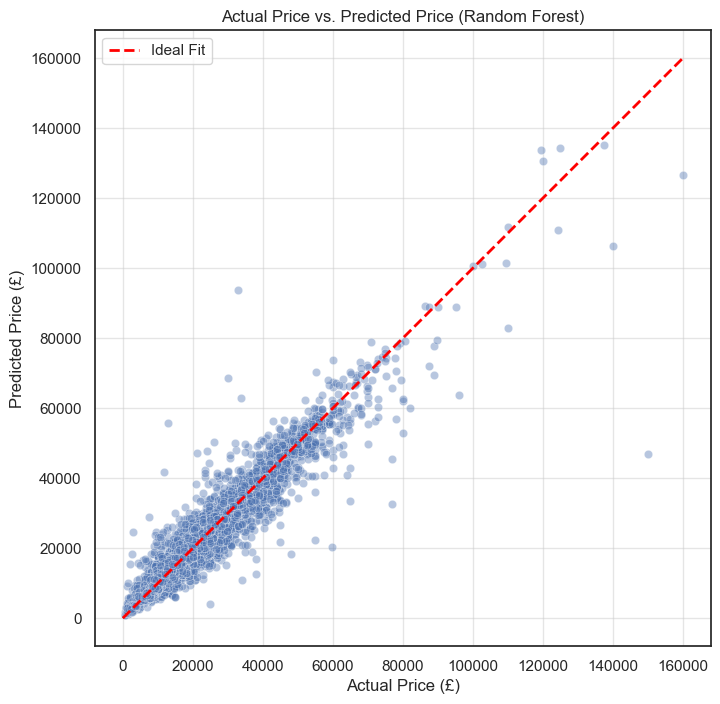

In [450]:
y_val_aligned = y_val.loc[X_val_final.index]
y_val_pred_rf_recalc = rf_model.predict(X_val_final)

comparison_df = pd.DataFrame({
    'Actual Price': y_val_aligned.values, 
    'Predicted Price': y_val_pred_rf_recalc
}, index=X_val_final.index) 

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=comparison_df, alpha=0.4)
# Add the ideal line (45-degree line)
max_val = max(comparison_df['Actual Price'].max(), comparison_df['Predicted Price'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

plt.title('Actual Price vs. Predicted Price (Random Forest)')
plt.xlabel('Actual Price (£)')
plt.ylabel('Predicted Price (£)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
# plt.savefig('rf_prediction_vs_actual.png')
plt.show()

The **Random Forest Regressor** demonstrates good predictive accuracy and generalization capacity. The scatter plot above shows a strong alignment along the 45° ideal line, confirming a high R² and a low RMSE. The clustering indicates minimal prediction error and validates the model’s ability to capture complex, non-linear relationships that linear models failed to represent.  

There could be risks of overfitting amplified by the Random Forest Regressor, as the model had to learn directly from a highly skewed target distribution with extreme values.

#### Kaggle Submission - 14 features

In [451]:
# safe Fallback 
try:
    best_model
except NameError:
    if "rf_model" in globals():
        best_model = rf_model
        print("Using Random Forest Regressor (rf_model) as best_model.")
    else:
        raise RuntimeError("No trained model found. ")

# Generate Predictions
y_test_pred = best_model.predict(test_final)
# Clip negatives and round to integers
y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)
y_test_pred_rounded = np.rint(y_test_pred).astype(int)

car_ids = test_final.index.values
# Build submission DataFrame
submission = pd.DataFrame({
    "carID": car_ids,
    "price": y_test_pred_rounded
})

# Save submission with versioned filename (Kaggle format)
data_dir = "project_data"
sub_dir = os.path.join(data_dir, "submissions")
os.makedirs(sub_dir, exist_ok=True)

version_number = "02"    # Update version for each submission
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
filename = f"Group27_Version{version_number}.csv"
sub_path = os.path.join(sub_dir, filename)

submission.to_csv(sub_path, index=False)
print(f"Submission file saved to: {sub_path}")
display(submission.head(10))

Submission file saved to: project_data\submissions\Group27_Version02.csv


,carID,price
0,89856,22869
1,106581,24972
2,80886,13920
3,100174,16754
4,81376,21070
5,85391,11168
6,82175,15493
7,95250,15142
8,85071,5296
9,96210,16782


#### Trying with 12 features (discard `owners_cat_SingleOwner` and `paint_condition_Excellent`)

In [459]:
# Define final features
final_features_v2 = [
    'car_age',
    'log_engineSize',
    'log_tax',
    'Brand_encoded',
    'model_encoded',
    'log_mpg',
    'log_avg_mileage',
    'is_top_seller',
    'transmission_Manual',
    'transmission_Semi-auto',
    'fuelType_Hybrid',
    'fuelType_Petrol'
]

In [453]:
# Train the final Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled[final_features_v2], y_train)
print("Model successfully trained with final_features_v2")

Model successfully trained with final_features_v2


In [454]:
# Generate predictions on the test set
# Ensure the test set uses the same feature order
test_final = test_scaled[final_features_v2]

# Generate predictions
y_test_pred = rf_model.predict(test_final)

# Post-process: clip negatives and round to integers
y_test_pred = np.clip(y_test_pred, a_min=0, a_max=None)
y_test_pred_rounded = np.rint(y_test_pred).astype(int)

#### Kaggle Submission - 12 features

In [455]:
car_ids = test_final.index.values

submission = pd.DataFrame({
    "carID": car_ids,
    "price": y_test_pred_rounded
})

# Save submission file (Kaggle format)

data_dir = "project_data"
sub_dir = os.path.join(data_dir, "submissions")
os.makedirs(sub_dir, exist_ok=True)

version_number = "03"   
filename = f"Group27_Version{version_number}.csv"
sub_path = os.path.join(sub_dir, filename)

submission.to_csv(sub_path, index=False)
print(f"Submission file saved to: {sub_path}")
display(submission.head(10))

Submission file saved to: project_data\submissions\Group27_Version03.csv


,carID,price
0,89856,23015
1,106581,25020
2,80886,14029
3,100174,16691
4,81376,21076
5,85391,11404
6,82175,15249
7,95250,15242
8,85071,5254
9,96210,16087


#### Trying with 12 features and with the logarithmic transformation of the the target variable (`price`)

The target variable `price` exhibited a highly right-skewed distribution (as we can see in the numeric variables' histogram previously made), with a long tail caused by a small proportion of extremely expensive cars. Such skewness violates the normality and homoscedasticity assumptions of many regression algorithms and can lead to models that overweight high-value outliers while underestimating the majority of mid-range prices.

To address this, **a logarithmic transformation was applied to the target variable before training.** 
This transformation compresses large values and expands small ones, resulting in a more symmetric and homoscedastic distribution of the target. Consequently, the model can better capture relative price differences rather than absolute ones, improving both stability and generalization.

After prediction, the *inverse transformation (np.expm1())* was applied to return the predicted prices to their original scale (£).

In [464]:
# Logarithmic transformation of the target variable 
y_train_log = np.log1p(y_train) 

X_train_final = X_train_scaled[final_features_v2]
X_val_final = X_val_scaled[final_features_v2]
test_final = test_scaled[final_features_v2]

# Train the final Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    max_features='sqrt',
    random_state=27,
    n_jobs=-1
)

In [465]:
# Training with log-transformed target variable
rf_model.fit(X_train_final, y_train_log)

# Generate predictions on the test set
y_test_pred_log = rf_model.predict(test_final)

# Apply the inverse function (np.expm1) to return the price to the original scale
y_test_pred_original = np.expm1(y_test_pred_log)

# Clip negatives and round to integers
y_test_pred = np.clip(y_test_pred_original, a_min=0, a_max=None)
y_test_pred_rounded = np.rint(y_test_pred).astype(int)

car_ids = test_final.index.values

In [466]:
# Generate predictions in logarithmic scale on the validation set
y_val_pred_log = rf_model.predict(X_val_final)

# Apply the inverse function (np.expm1) to return the price to the original scale
y_val_pred_original = np.expm1(y_val_pred_log)

# This is the R² for log(Price) vs. log(Price) Prediction
y_val_log = np.log1p(y_val)
r2_log_scale = r2_score(y_val_log, y_val_pred_log)
# This is the R² for Actual Price vs. Predicted Price (after np.expm1)
r2_original_scale = r2_score(y_val, y_val_pred_original)

print(f"R² Score on Validation Set:")
print(f"  > R² on Logarithmic Scale: {r2_log_scale:.4f}")
print(f"  > R² on Original Price Scale: {r2_original_scale:.4f}")

R² Score on Validation Set:
  > R² on Logarithmic Scale: 0.9456
  > R² on Original Price Scale: 0.9302


The model trained on the log-transformed target achieved improved performance, with an R² of 0.9456 in log-space and 0.9302 on the original scale, confirming that the transformation enhanced the model’s explanatory power and reduced the influence of extreme values.

In [467]:
submission = pd.DataFrame({
    "carID": car_ids,
    "price": y_test_pred_rounded
})

# Save submission file 
data_dir = "project_data"
sub_dir = os.path.join(data_dir, "submissions")
os.makedirs(sub_dir, exist_ok=True)

# Incrementing the version to indicate the logarithmic transformation
version_number = "06"  
filename = f"Group27_Version{version_number}.csv"
sub_path = os.path.join(sub_dir, filename)

submission.to_csv(sub_path, index=False)
print(f"Submission file saved to: {sub_path}")
display(submission.head(10))

Submission file saved to: project_data\submissions\Group27_Version06.csv


,carID,price
0,89856,14413
1,106581,24597
2,80886,14009
3,100174,16396
4,81376,22082
5,85391,11209
6,82175,14814
7,95250,13442
8,85071,5195
9,96210,16657
